<h1>Ejercicio de Modelado de Esperanza de Vida</h1>
<p>El conjunto de datos de esperanzas de vida 
(<a href="https://www.kaggle.com/datasets/iamsouravbanerjee/life-expectancy-who" target="_blank">
    Life Expectancy (WHO) | Kaggle</a>) tiene el registro de la esperanza de vida de 193 países medida en diferentes años, 
junto con otras variables que se pueden relacionar con riesgos a la salud y la mortalidad. El conjunto de datos 
se puede <a href="https://www.kaggle.com/datasets/iamsouravbanerjee/life-expectancy-who" target="_blank">descargar aquí</a>. 
Para este ejercicio, sólo se considerará como variable dependiente la cuarta columna ("Life expectancy").</p>

<h2>Variables Independientes de Interés:</h2>
<ul>
    <li>X1 - Adult mortality</li>
    <li>X2 - Infant deaths</li>
    <li>X3 - Alcohol</li>
    <li>X4 - Percentage expenditure</li>
    <li>X5 - Hepatitis B</li>
    <li>X6 - Measles</li>
    <li>X7 - BMI</li>
    <li>X8 - Under-five deaths</li>
    <li>X9 - Polio</li>
    <li>X10 - Total expenditure</li>
    <li>X11 - Diphtheria</li>
    <li>X12 - HIV/AIDS</li>
    <li>X13 - GDP</li>
    <li>X14 - Population</li>
    <li>X15 - Thinness 1-19 years</li>
    <li>X16 - Thinness 5-9 years</li>
    <li>X17 - Income composition of resources</li>
    <li>X18 - Schooling</li>
</ul>

<h2>Instrucciones:</h2>
<ol>
    <li>Grafica cada variable predictora vs la variable de respuesta asignada a tu número de matrícula.</li>
    <li>Implementa la fórmula directa para calcular los coeficientes de un modelo de regresión lineal, 
    y obtén con ella el modelo que corresponde a la variable de respuesta y las variables predictoras asignadas a tu número de matrícula.</li>
    <li>Evalúa con validación cruzada de k-pliegues tu modelo, calculando los valores de R², MSE y MAE.</li>
    <li>Utiliza validación cruzada de Monte Carlo con 1000 iteraciones para encontrar histogramas de R², MSE y MAE.</li>
    <li>Utiliza el método de validación cruzada asignado a tu matrícula para mostrar los histogramas de MSE y MAE.</li>
    <li>¿Los histogramas son distintos a los obtenidos con el método de Monte Carlo?</li>
    <li>Agrega al conjunto de datos columnas que representen los cuadrados de las variables predictoras (por ejemplo, X1², X2²), 
    así como los productos entre pares de variables (por ejemplo, X1xX2, X3xX4). Repite los pasos 1, 2 y 3 pero con este nuevo conjunto de datos.</li>
    <li>Implementa regresión Ridge con descenso de gradiente, y genera el gráfico de Ridge para el conjunto de datos original (sin las variables elevadas al cuadrado).</li>
    <li>Utiliza una librería para generar el gráfico de Lasso para el conjunto de datos original (sin las variables elevadas al cuadrado). 
    ¿Qué variables son más relevantes para el modelo?</li>
</ol>

<h2>Conclusiones:</h2>
<ul>
    <li>¿Consideras que el modelo de regresión lineal es efectivo para modelar los datos del problema? ¿Por qué?</li>
    <li>¿Observas una variabilidad importante en los valores de R², MSE y MAE cuando aplicas validación cruzada? Detalla tu respuesta.</li>
    <li>¿Qué modelo es mejor para los datos del problema, el lineal o el cuadrático? ¿Por qué?</li>
    <li>¿Qué variables son más relevantes para el modelo según Ridge y Lasso?</li>
    <li>¿Encuentras alguna relación interesante entre la variable de respuesta y los predictores?</li>
</ul>

<h2>Notas:</h2>
<p><strong>Nota 1:</strong> Las variables con las que vas a trabajar dependen del penúltimo número de tu matrícula de acuerdo a la siguiente lista:</p>
<ul>
    <li>0, 1 - Todas las variables, menos X1, X5, X9, X13, X17</li>
    <li>2, 3 - Todas las variables, menos X2, X6, X10, X14, X18</li>
    <li>4, 5 - Todas las variables, menos X3, X7, X11, X15</li>
    <li>6, 7 - Todas las variables, menos X4, X8, X12, X16</li>
    <li>8, 9 - Todas las variables, menos X5, X9, X13, X17</li>
</ul>

<p><strong>Nota 2:</strong> El método de validación cruzada a utilizar en el punto 4 depende de tu número de matrícula. 
Si es impar, se pide LOOCV. Si es par, se pide el método Leave-P-Out para P = 2.</p>

8, 9 - Todas las variables, menos X5, X9, X13, X17

In [127]:
import pandas as pd
import numpy as np
import numpy.linalg as ln
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [128]:
dataframe=pd.read_csv('data\life_expectancy_data.csv')

In [129]:
#Columnas con valores nulos= Alchol, total expenditure , Population
#Elimino los registros con valores nulos o faltantes
clean_dataframe=dataframe.dropna()

<h2>1. Grafica cada variable predictora vs la variable de respuesta asignadas a tu número de matrícula.</h2>

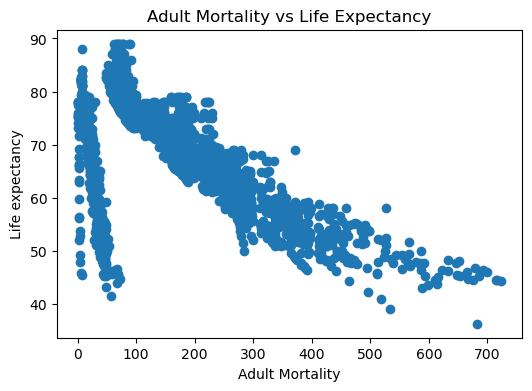

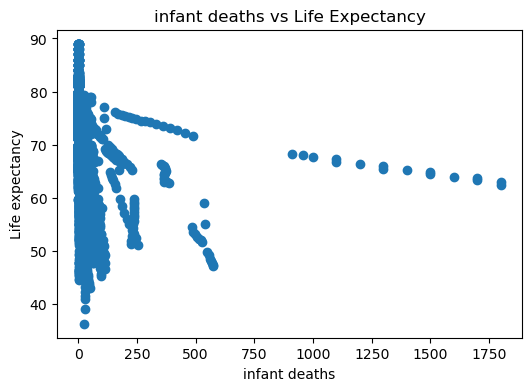

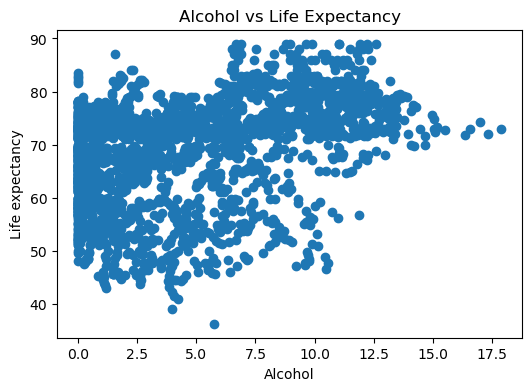

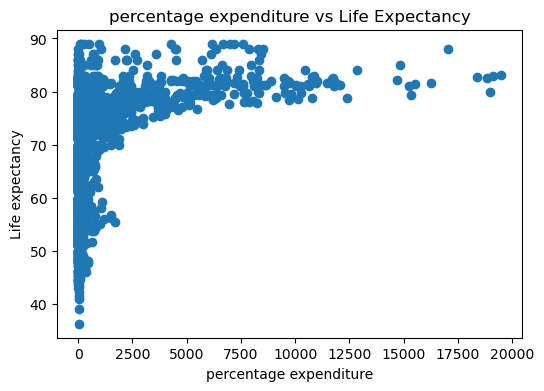

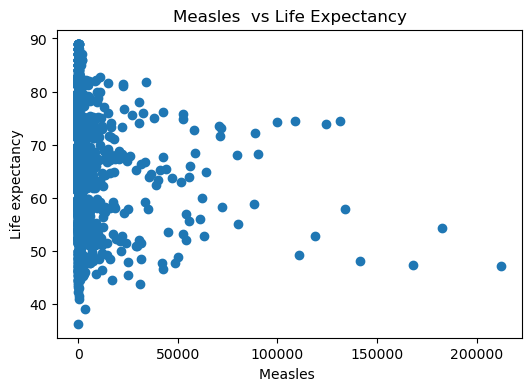

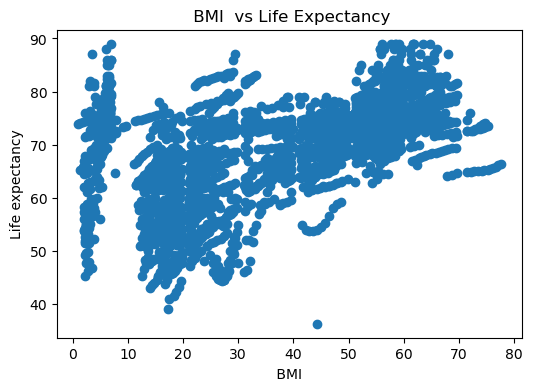

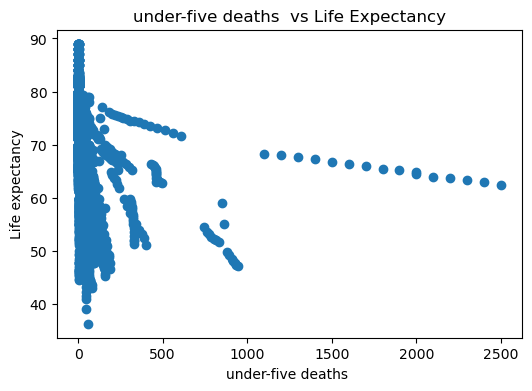

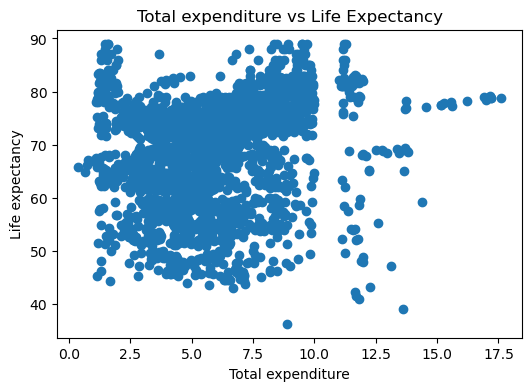

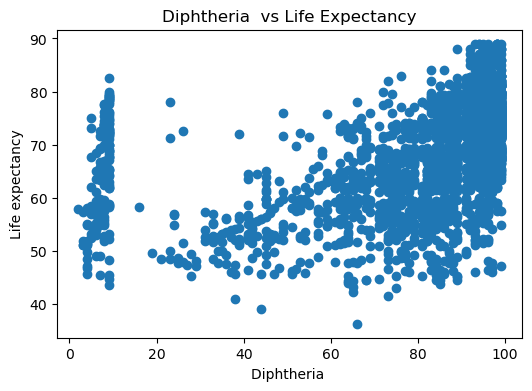

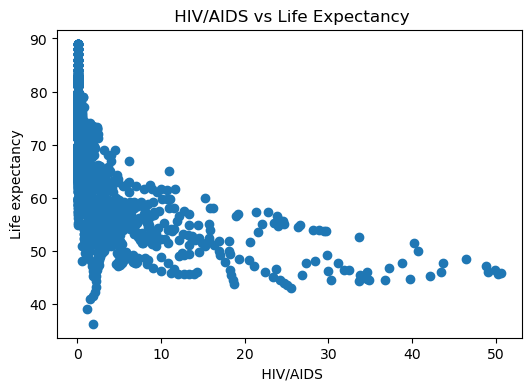

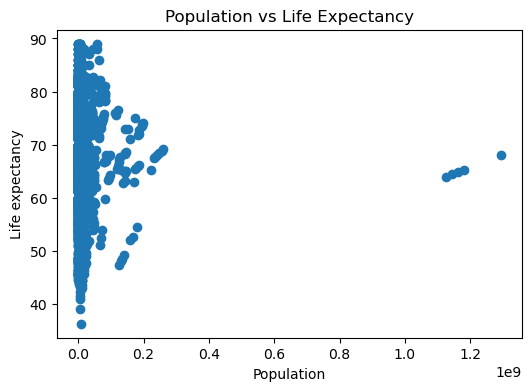

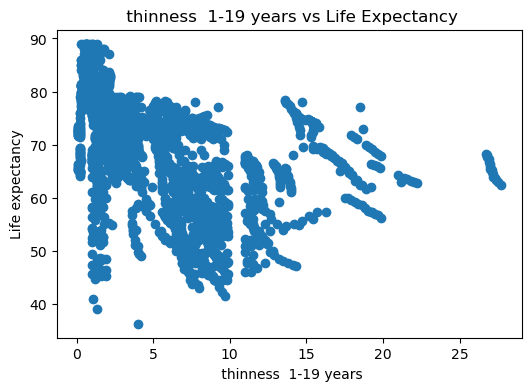

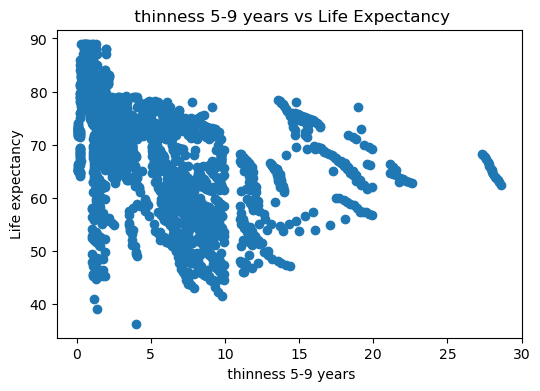

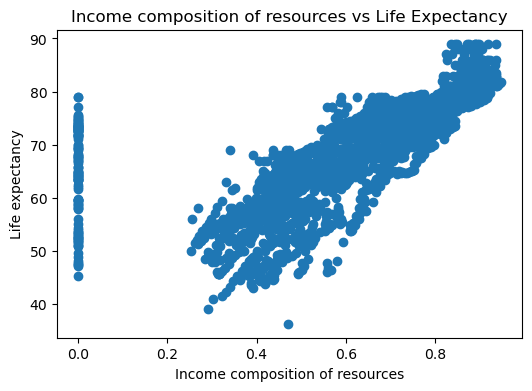

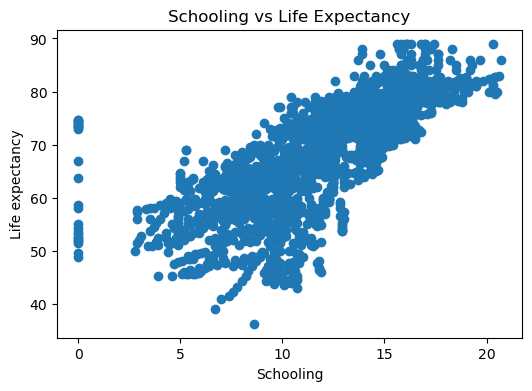

In [130]:
variables_independientes = ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 
                                                 'Measles ', ' BMI ', 'under-five deaths ', 'Total expenditure', 
                                                 'Diphtheria ', ' HIV/AIDS', 'Population', 
                                                 ' thinness  1-19 years', ' thinness 5-9 years', 
                                                 'Income composition of resources', 'Schooling']

# Crear gráficos de dispersión para cada variable independiente contra Life expectancy
for var in variables_independientes:
    plt.figure(figsize=(6, 4))
    plt.scatter(dataframe[var], dataframe['Life expectancy '])
    plt.xlabel(var)
    plt.ylabel('Life expectancy')
    plt.title(f'{var} vs Life Expectancy')
    plt.show()

<h2>2. Implementa la fórmula directa para calcular los coeficientes de un modelo de regresión lineal, y obtenga con ella el modelo que corresponde a la variable de respuesta y las variables predictoras asignadas a tu número de matrícula.</h2>

In [131]:
# Función para calcular el gradiente de la función de error (MSE)
# def grad(X, y, beta):
#     n = len(y)
#     y_predict = X @ beta
#     res = y - y_predict    
#     tmp = res * X.T
#     return -(2/n) * tmp.sum(axis=1)
# 
# # Función para predecir con el modelo ajustado
# def predict(X, beta):
#     return X @ beta

# Función para ajustar el modelo usando gradiente descendente
# def fit_model(X, y, alpha=0.005, maxit=10000):
#     # Número de predictores
#     npredictors = X.shape[1]    
# 
#     # Inicializar beta aleatoriamente
#     beta = 2 * np.random.rand(npredictors) - 1.0
#     
#     # Algoritmo de optimización
#     it = 0    
#     while (ln.norm(grad(X, y, beta)) > 1e-4) and (it < maxit):    
#         beta = beta - alpha * grad(X, y, beta)
#         it = it + 1
# 
#     return beta

# Función para calcular el gradiente de la función de error (MSE)
def grad(X, y, beta):
    n = len(y)
    y_predict = X @ beta
    res = y - y_predict    
    return -(2/n) * (X.T @ res)

# Función para predecir con el modelo ajustado
def predict(X, beta):
    return X @ beta

# Función para ajustar el modelo usando gradiente descendente
def fit_model(X, y, alpha=0.005, maxit=10000):
    # Número de predictores
    npredictors = X.shape[1]

    # Inicializar beta como un vector de ceros
    beta = np.zeros(npredictors)

    # Algoritmo de optimización
    it = 0
    while (ln.norm(grad(X, y, beta)) > 1e-4) and (it < maxit):
        beta = beta - alpha * grad(X, y, beta)

        # Verificar si los coeficientes se vuelven demasiado grandes y detener
        if np.any(np.abs(beta) > 1e3):
            print("Los coeficientes son demasiado grandes, deteniendo el entrenamiento.")
            break

        it = it + 1

    return beta


In [132]:
# Escalar los datos
x=clean_dataframe[['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 
                                                 'Measles ', ' BMI ', 'under-five deaths ', 'Total expenditure', 
                                                 'Diphtheria ', ' HIV/AIDS', 'Population', 
                                                 ' thinness  1-19 years', ' thinness 5-9 years', 
                                                 'Income composition of resources', 'Schooling']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clean_dataframe[['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 
                                                 'Measles ', ' BMI ', 'under-five deaths ', 'Total expenditure', 
                                                 'Diphtheria ', ' HIV/AIDS', 'Population', 
                                                 ' thinness  1-19 years', ' thinness 5-9 years', 
                                                 'Income composition of resources', 'Schooling']])

# Matriz con valores de las variables independientes (predictoras) escaladas y agregando el término independiente
X = np.column_stack((np.ones(X_scaled.shape[0]), X_scaled))

# Matriz con valores de la variable dependiente (respuesta)
y = clean_dataframe['Life expectancy '].values

# Ajustar el modelo a los datos
beta = fit_model(X, y)
print("Coeficientes del modelo: ", beta)
print("Coeficientes: ", beta.size)

Coeficientes del modelo:  [69.30230443 -2.22845127  2.32809763 -0.36276501  0.80624029  0.11109587
  0.68694    -2.70239782  0.16671078  0.43341264 -2.64337084  0.14122433
 -0.07037823 -0.13054442  1.88638343  2.54065506]
Coeficientes:  16


In [133]:
X

array([[ 1.        ,  0.75662881,  0.24374477, ...,  2.66365382,
        -0.83346213, -0.72279909],
       [ 1.        ,  0.82048963,  0.26029961, ...,  2.70664289,
        -0.8498526 , -0.75858316],
       [ 1.        ,  0.79654182,  0.27685446, ...,  2.74963196,
        -0.88263354, -0.79436723],
       ...,
       [ 1.        , -0.76006583, -0.0625199 , ..., -0.77547171,
        -1.11756359, -0.75858316],
       [ 1.        ,  4.13327002, -0.0625199 , ..., -0.68949357,
        -1.11756359, -0.8301513 ],
       [ 1.        ,  3.96563535, -0.07079732, ...,  1.35248721,
        -1.07931916, -0.8301513 ]])

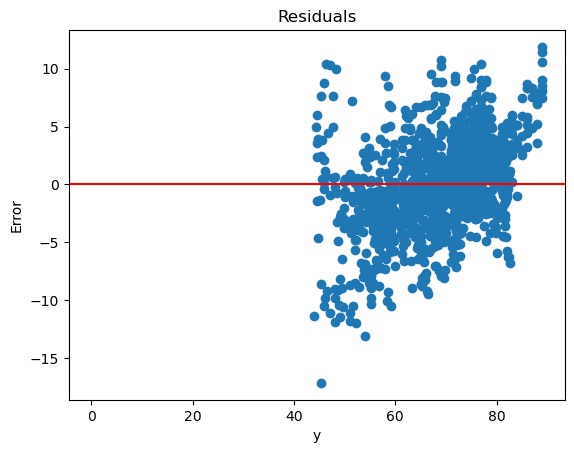

In [134]:
# Evaluate residuals
y_pred = predict(X, beta)
r = y - y_pred

# Plot residuals
plt.scatter(y, r)
plt.axline((0, 0), slope = 0, color = 'red')
plt.xlabel('y')
plt.ylabel('Error')
plt.title('Residuals')
plt.show()

In [135]:
# Create a DataFrame from the scaled data
scaled_df = pd.DataFrame(X, columns=['Intercept','Adult Mortality', 'infant deaths', 'Alcohol', 
                                           'percentage expenditure', 'Measles ', ' BMI ', 
                                           'under-five deaths ', 'Total expenditure', 
                                           'Diphtheria ', ' HIV/AIDS', 'Population', 
                                           ' thinness  1-19 years', ' thinness 5-9 years', 
                                           'Income composition of resources', 'Schooling'])

# Export the DataFrame to a CSV file
scaled_df.to_csv('data/outputs/problem1/scaled_data.csv', index=False)

In [136]:
# Calculate MSE, MAE and R^2 with the training set
print('MSE: ', mean_squared_error(y, y_pred))
print("MAE: ", mean_absolute_error(y, y_pred))
print("R^2: ", r2_score(y, y_pred))

MSE:  13.202392492844268
MAE:  2.780757158443028
R^2:  0.8292883023637843


<h2>3. valúa con validación cruzada de k-pliegues tu modelo, calculando los valores de R2, MSE y MAE.</h2>

mse =  15.514204641619337
mae =  3.0145050014533097
r^2=  0.8018729202015797
mse =  12.918887270756901
mae =  2.6620850347495684
r^2=  0.8220075444056038
mse =  12.73520203400171
mae =  2.740080367950426
r^2=  0.8387662516824501
mse =  13.524310103643494
mae =  2.8920377058148397
r^2=  0.8377568428262041
mse =  13.704655336948095
mae =  2.8432022537414188
r^2=  0.8111985159869136
MSE: 13.679451877393907   MAE: 2.8303820727419127   R^2: 0.8223204150205502


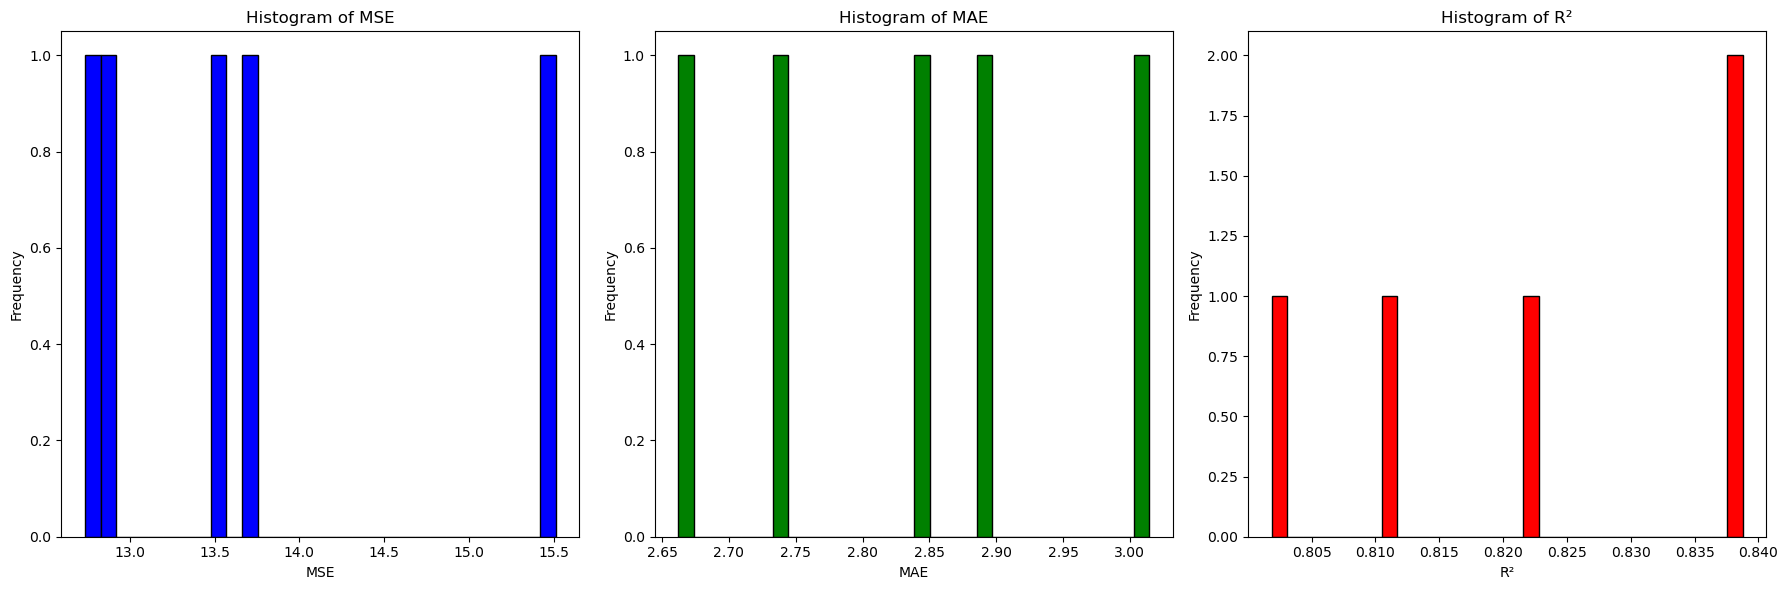

In [137]:
# Evaluate model with cross validation
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle = True)

mse_cv = []
mae_cv = []
r2_cv = []
for train_index, test_index in kf.split(X):

    # Training phase
    x_train = X[train_index, :]
    y_train = y[train_index]
    beta_cv = fit_model(x_train, y_train)

    # Test phase
    x_test = X[test_index, :]
    y_test = y[test_index]
    y_pred = predict(x_test, beta_cv)

    # Calculate MSE, MAE and R^2
    mse_i = mean_squared_error(y_test, y_pred)
    print('mse = ', mse_i)  
    mse_cv.append(mse_i)    

    mae_i = mean_absolute_error(y_test, y_pred)
    print('mae = ', mae_i)    
    mae_cv.append(mae_i)
    
    r2_i = r2_score(y_test, y_pred)
    print('r^2= ', r2_i)    
    r2_cv.append(r2_i)   
    
print('MSE:', np.average(mse_cv), '  MAE:', np.average(mae_cv),'  R^2:', np.average(r2_cv))

# Plot histograms for MSE, MAE, and R²
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(mse_cv, bins=30, color='blue', edgecolor='black')
plt.title('Histogram of MSE')
plt.xlabel('MSE')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(mae_cv, bins=30, color='green', edgecolor='black')
plt.title('Histogram of MAE')
plt.xlabel('MAE')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(r2_cv, bins=30, color='red', edgecolor='black')
plt.title('Histogram of R²')
plt.xlabel('R²')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


<h2>4. Utiliza validación cruzada de Monte Carlo con 1000 iteraciones para encontrar histogramas de R2, MSE y MAE</h2>

mse =  13.704655336948095
2.7401212996113697
r^2=  0.8116971887776665
mse =  13.704655336948095
2.858304321381983
r^2=  0.8186627635307583
mse =  13.704655336948095
2.8972832567186404
r^2=  0.819130140811191
mse =  13.704655336948095
2.8232885080445214
r^2=  0.8101278018568888
mse =  13.704655336948095
2.926676276741915
r^2=  0.8062337939177286
mse =  13.704655336948095
3.086288885719732
r^2=  0.77646049696741
mse =  13.704655336948095
2.9520007743227867
r^2=  0.8214465749454136
mse =  13.704655336948095
2.8561042568931163
r^2=  0.8273222986863604
mse =  13.704655336948095
2.893910526175335
r^2=  0.8251083529424648
mse =  13.704655336948095
2.8401558898741204
r^2=  0.8260983086888729
mse =  13.704655336948095
2.875755196732623
r^2=  0.8348835110259608
mse =  13.704655336948095
2.7606599797344713
r^2=  0.8290141153305477
mse =  13.704655336948095
2.7921017774923724
r^2=  0.80821606601719
mse =  13.704655336948095
2.860925087547195
r^2=  0.8141181385078896
mse =  13.704655336948095
2.759

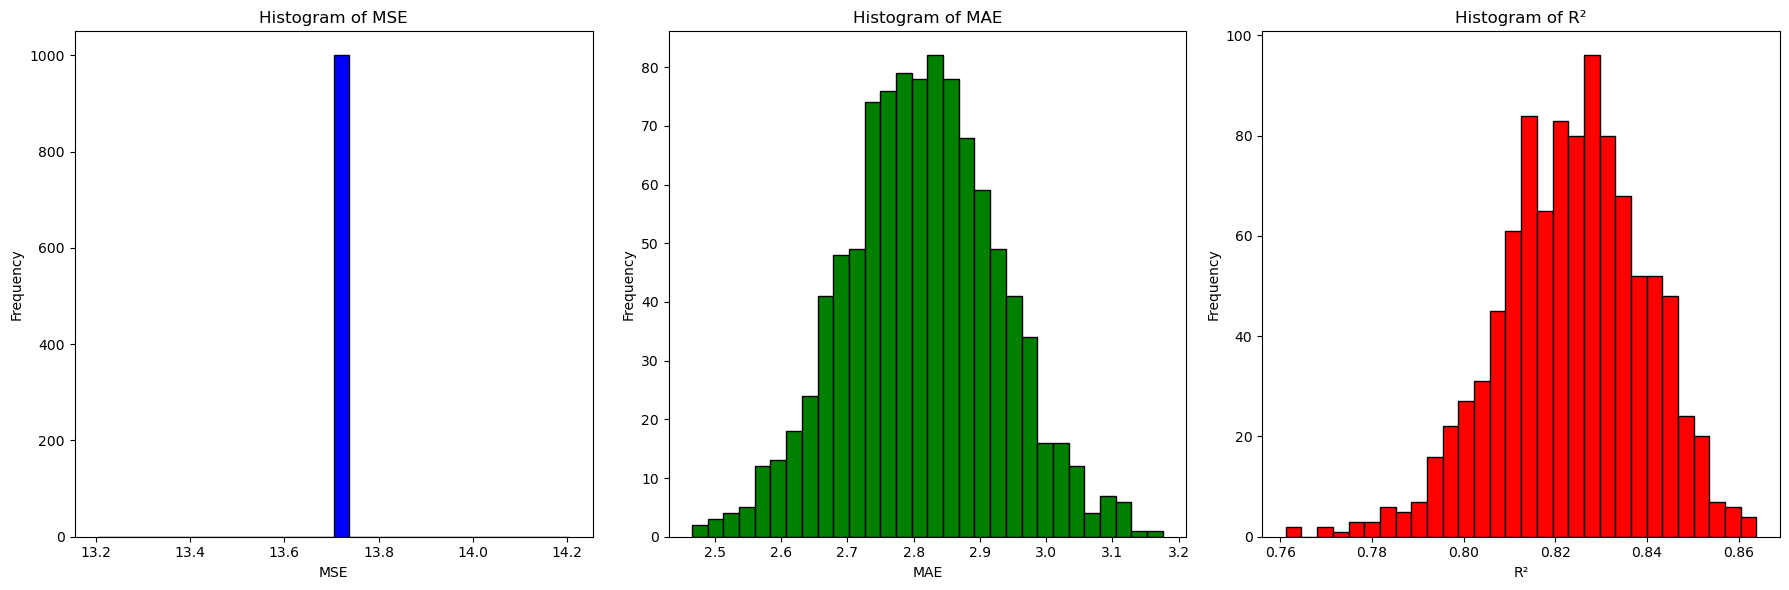

In [138]:
#Monte Carlo
# Number of Monte Carlo iterations
n_iterations = 1000
test_size = 0.2  # 20% of the data for testing in each iteration

mse_values = []
mae_values = []
r2_values = []

for _ in range(n_iterations):
    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    # Fit the model
    beta_mc = fit_model(x_train, y_train)
    
    # Predict on the test set
    y_pred = predict(x_test, beta_mc)
    
    # Calculate MSE, MAE, and R²
    mae_i=mean_squared_error(y_test, y_pred)
    print('mse = ', mse_i)  
    mse_values.append(mse_i)
    
    mae_i=mean_absolute_error(y_test, y_pred)
    print(mae_i)
    mae_values.append(mae_i)
    r2_i=r2_score(y_test, y_pred)
    print('r^2= ', r2_i)
    r2_values.append(r2_i)

print('MSE:', np.average(mse_values), '  MAE:', np.average(mae_values),'  R^2:', np.average(r2_values))

# Plot histograms for MSE, MAE, and R²
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(mse_values, bins=30, color='blue', edgecolor='black')
plt.title('Histogram of MSE')
plt.xlabel('MSE')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(mae_values, bins=30, color='green', edgecolor='black')
plt.title('Histogram of MAE')
plt.xlabel('MAE')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(r2_values, bins=30, color='red', edgecolor='black')
plt.title('Histogram of R²')
plt.xlabel('R²')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<h2>5. Utiliza el método de validación cruzada asignado a tu matrícula para mostrar los histogramas de MSE y MAE</h2>

mse =  82.31256194883854
mae =  9.072627069864524
mse =  0.8629213157050419
mae =  0.9289355821073073
mse =  2.061380992554478
mae =  1.435751020391237
mse =  16.744351878019888
mae =  4.091986299832868
mse =  7.938181750716509
mae =  2.8174779059855126
mse =  33.488043112461646
mae =  5.786885441449627
mse =  3.8340718975621955
mae =  1.9580786239480261
mse =  63.27919351813417
mae =  7.954822029318706
mse =  0.045674967940347956
mae =  0.21371702772673018
mse =  68.00107501967115
mae =  8.24627643361967
mse =  0.012390551414481983
mae =  0.11131285377027211
mse =  41.51044662539068
mae =  6.4428601277220565
mse =  0.031198202369482387
mae =  0.17663012871388162
mse =  16.724446035418676
mae =  4.089553280667545
mse =  8.72469658160979
mae =  2.9537597366085464
mse =  7.912553385053955
mae =  2.81292612506158
mse =  3.100045251606165
mae =  1.7606945367116253
mse =  14.864473111163376
mae =  3.855447199893078
mse =  14.548797683426413
mae =  3.814288620886785
mse =  2.688711396342328


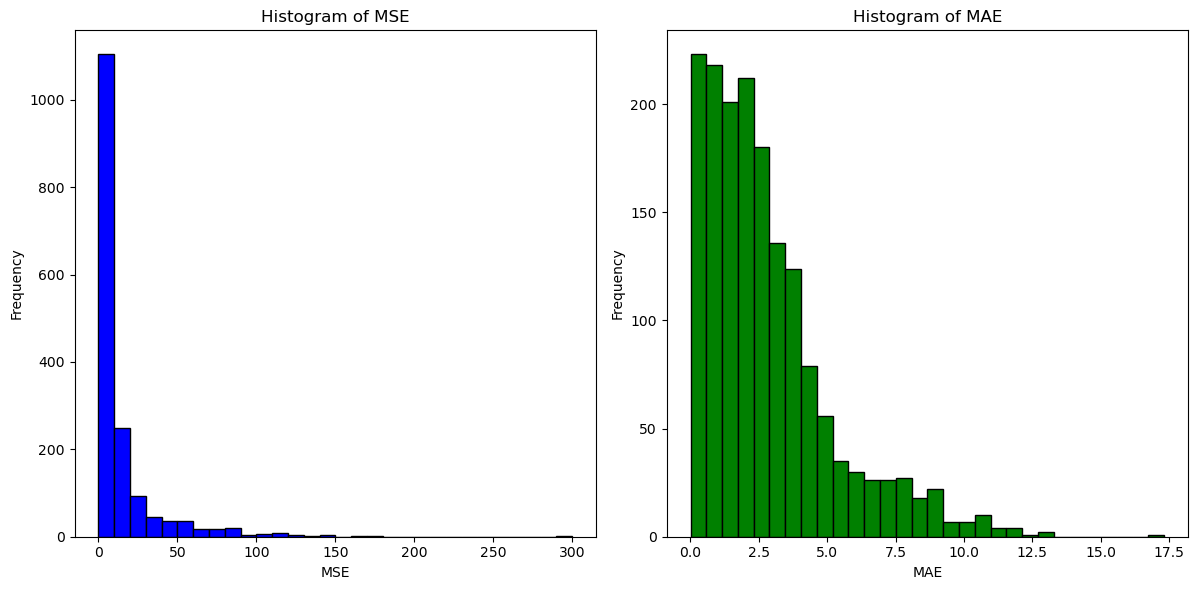

In [139]:
# Evaluate model with LOOCV
n_samples = len(X_scaled)
kf = KFold(n_splits=n_samples, shuffle=True)

mse_cv = []
mae_cv = []
for train_index, test_index in kf.split(X):

    # Training phase
    x_train = X[train_index, :]
    y_train = y[train_index]
    beta_cv = fit_model(x_train, y_train)

    # Test phase
    x_test = X[test_index, :]
    y_test = y[test_index]
    y_pred = predict(x_test, beta_cv)

    # Calculate MSE, MAE, and R^2
    mse_i = mean_squared_error(y_test, y_pred)
    print('mse = ', mse_i)  
    mse_cv.append(mse_i)    

    mae_i = mean_absolute_error(y_test, y_pred)
    print('mae = ', mae_i)    
    mae_cv.append(mae_i)

# Summary statistics
print('MSE:', np.average(mse_cv), '  MAE:', np.average(mae_cv))

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)

plt.subplot(1, 3, 1)
plt.hist(mse_cv, bins=30, color='blue', edgecolor='black')
plt.title('Histogram of MSE')
plt.xlabel('MSE')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(mae_cv, bins=30, color='green', edgecolor='black')
plt.title('Histogram of MAE')
plt.xlabel('MAE')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<h2>6. ¿Los histogramas son distintos a los obtenidos con el método de Monte Carlo?</h2>

Sí, los histogramas obtenidos con el método de Leave-One-Out Cross-Validation (LOOCV) son diferentes a los obtenidos con el método de Monte Carlo. En los histogramas de LOOCV, las distribuciones parecen seguir una distribución exponencial.
Mientras que los histogramas generados con el método de Monte Carlo muestran una distribución Gaussiana, lo que sugiere una mayor variabilidad y una convergencia más estable hacia un valor promedio. Esto se debe a que Monte Carlo toma múltiples muestras aleatorias, proporcionando una visión más robusta de la variabilidad de los datos.

<h2>7. Agrega al conjunto de datos columnas que representen los cuadrados de las variables predictoras (por ejemplo, X112, X132), así como los productos entre pares de variables (por ejemplo, X1xX2, X3xX4). Repita los pasos 1, 2 y 3 pero con este nuevo conjunto de datos.</h2>

In [140]:
# 1. Generate new features (squares and products)

# Start with the original predictors
x_expanded = X_scaled.copy()

# Adding squared terms for each predictor variable
squared_columns = [f'{col}_2' for col in variables_independientes]
#print(squared_columns)
for i in range(X_scaled.shape[1]):
    x_expanded = np.column_stack((x_expanded, X_scaled[:, i]**2))

# Adding product terms for each unique pair of predictor variables
product_columns = []
for i in range(X_scaled.shape[1]):
    for j in range(i + 1, X_scaled.shape[1]):  # Only loop over unique pairs
        product_columns.append(f'{variables_independientes[i]}_{variables_independientes[j]}')
        x_expanded = np.column_stack((x_expanded, X_scaled[:, i] * X_scaled[:, j]))
print(product_columns) 
# Adding the intercept term
X_final = np.column_stack((np.ones(X_scaled.shape[0]), x_expanded))


['Adult Mortality_infant deaths', 'Adult Mortality_Alcohol', 'Adult Mortality_percentage expenditure', 'Adult Mortality_Measles ', 'Adult Mortality_ BMI ', 'Adult Mortality_under-five deaths ', 'Adult Mortality_Total expenditure', 'Adult Mortality_Diphtheria ', 'Adult Mortality_ HIV/AIDS', 'Adult Mortality_Population', 'Adult Mortality_ thinness  1-19 years', 'Adult Mortality_ thinness 5-9 years', 'Adult Mortality_Income composition of resources', 'Adult Mortality_Schooling', 'infant deaths_Alcohol', 'infant deaths_percentage expenditure', 'infant deaths_Measles ', 'infant deaths_ BMI ', 'infant deaths_under-five deaths ', 'infant deaths_Total expenditure', 'infant deaths_Diphtheria ', 'infant deaths_ HIV/AIDS', 'infant deaths_Population', 'infant deaths_ thinness  1-19 years', 'infant deaths_ thinness 5-9 years', 'infant deaths_Income composition of resources', 'infant deaths_Schooling', 'Alcohol_percentage expenditure', 'Alcohol_Measles ', 'Alcohol_ BMI ', 'Alcohol_under-five deaths 

In [141]:
columns = ['Intercept'] + variables_independientes + squared_columns + product_columns
# Ensure columns list matches the number of columns in X_final
if X_final.shape[1] == len(columns):
    # Convert X_final to a DataFrame
    X_final_df = pd.DataFrame(X_final, columns=columns)
    
    # Save the DataFrame to a CSV file
    X_final_df.to_csv('data/outputs/problem1/X_final_data.csv', index=False)
else:
    print("Mismatch in the number of columns. Check the column names and data.")

In [142]:
X_final

array([[ 1.        ,  0.75662881,  0.24374477, ..., -2.22005459,
        -1.92528657,  0.60242567],
       [ 1.        ,  0.82048963,  0.26029961, ..., -2.30024749,
        -2.05321372,  0.64468387],
       [ 1.        ,  0.79654182,  0.27685446, ..., -2.42691738,
        -2.18421752,  0.70113516],
       ...,
       [ 1.        , -0.76006583, -0.0625199 , ...,  0.86663895,
         0.58825978,  0.84776492],
       [ 1.        ,  4.13327002, -0.0625199 , ...,  0.77055291,
         0.57238398,  0.92774686],
       [ 1.        ,  3.96563535, -0.07079732, ..., -1.45976536,
        -1.12276901,  0.8959982 ]])

<h2>7.1 Grafica cada variable predictora vs la variable de respuesta</h2>

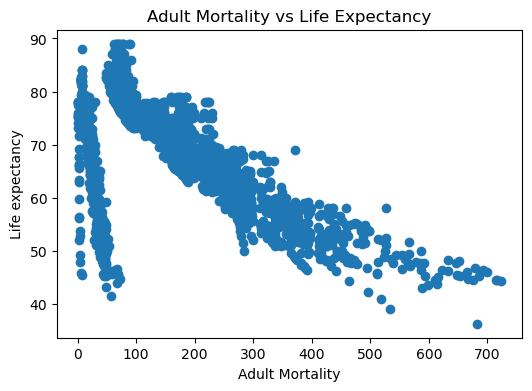

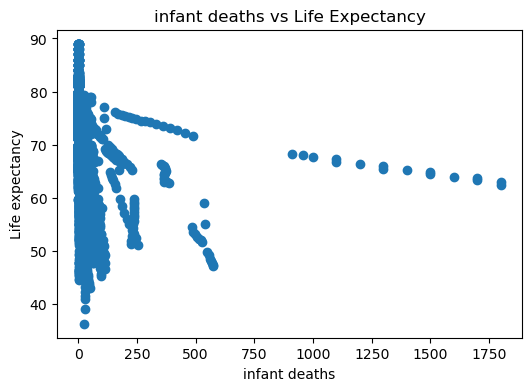

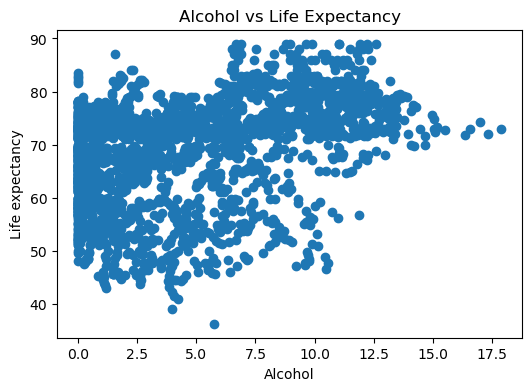

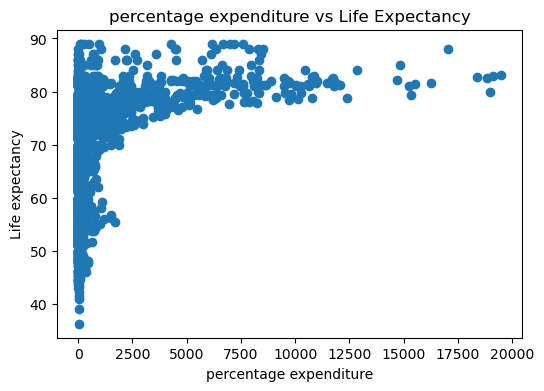

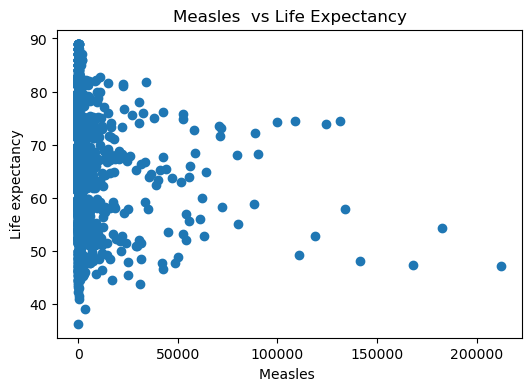

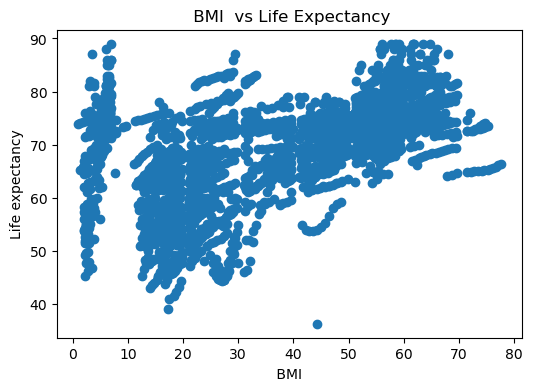

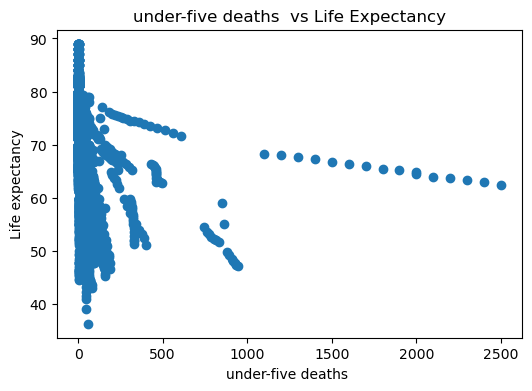

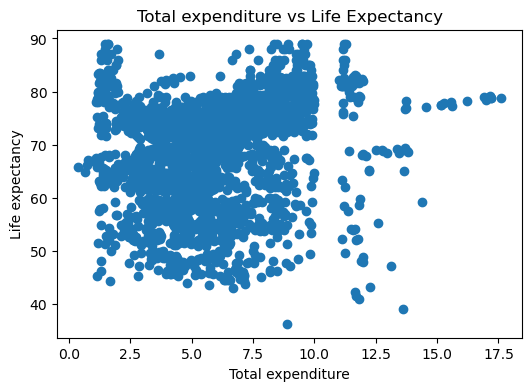

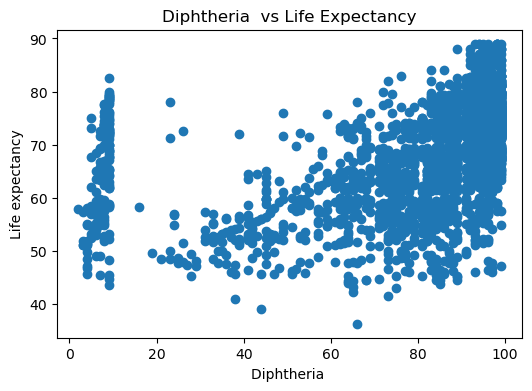

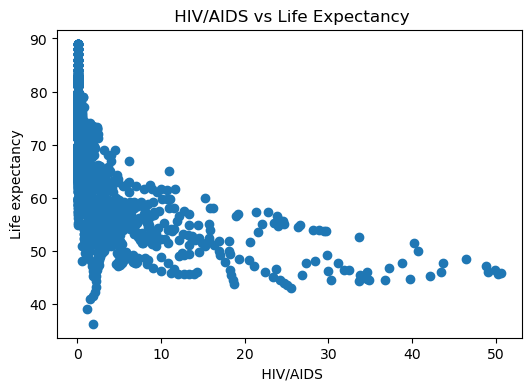

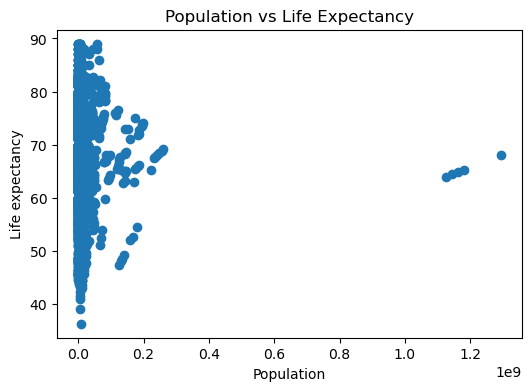

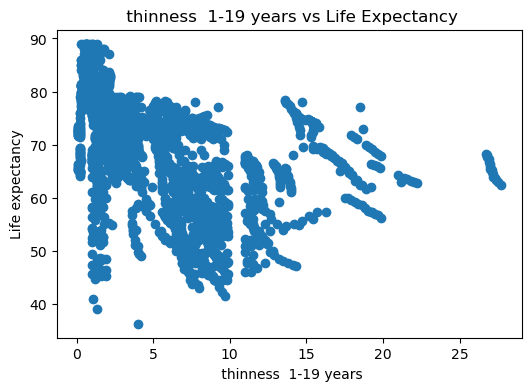

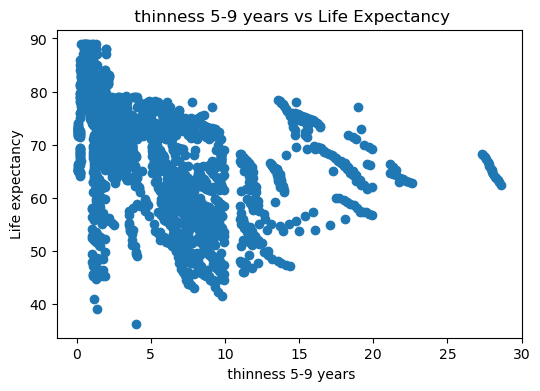

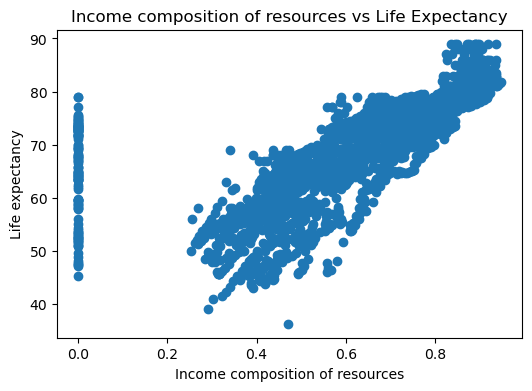

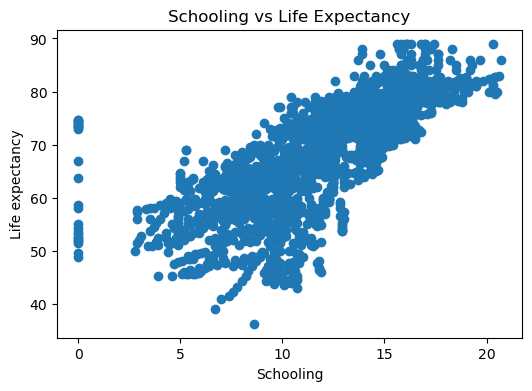

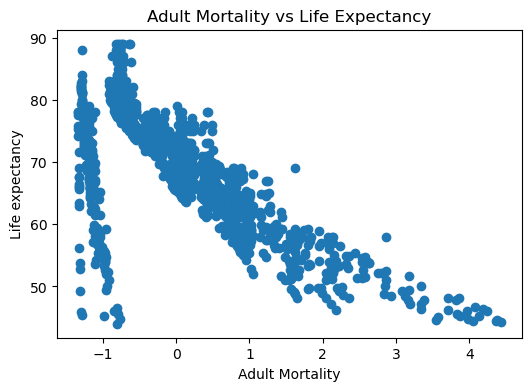

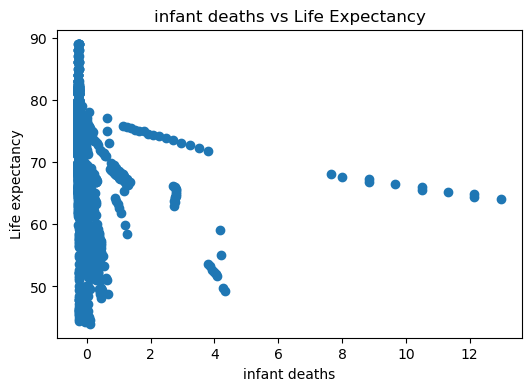

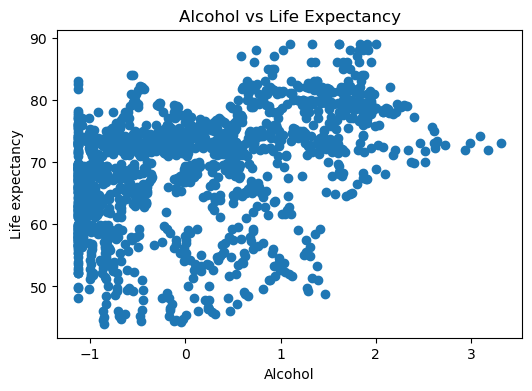

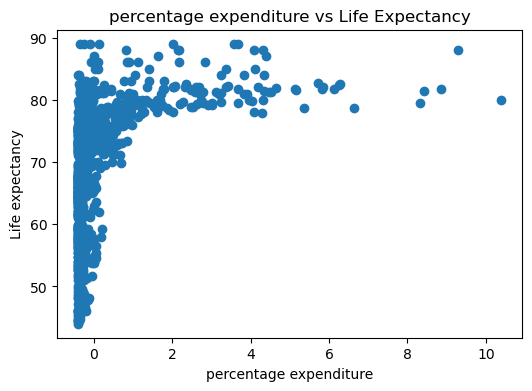

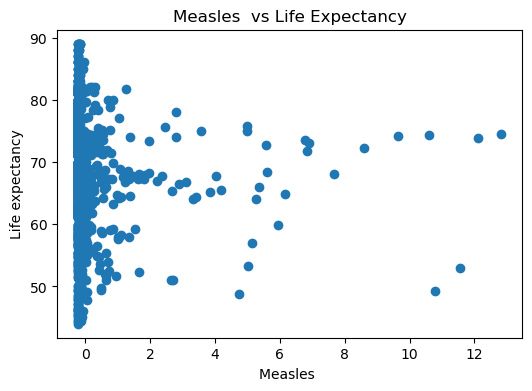

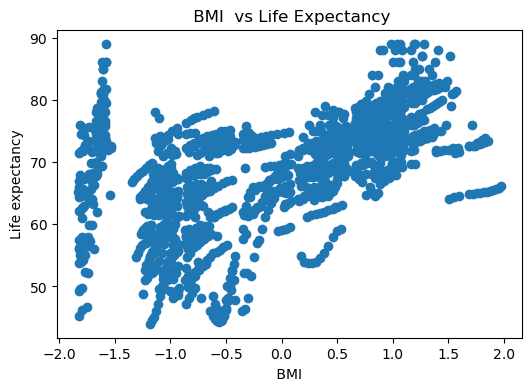

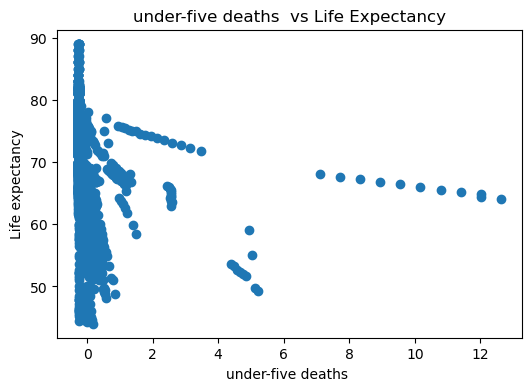

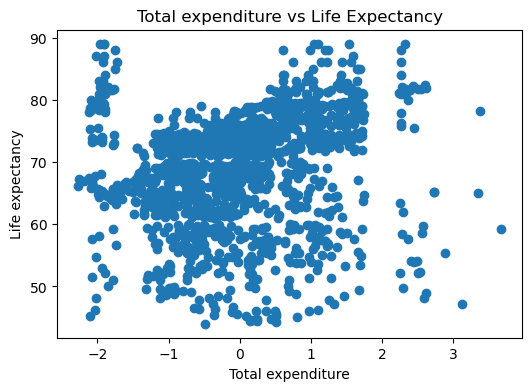

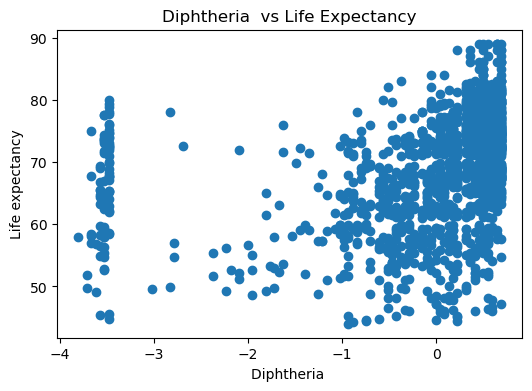

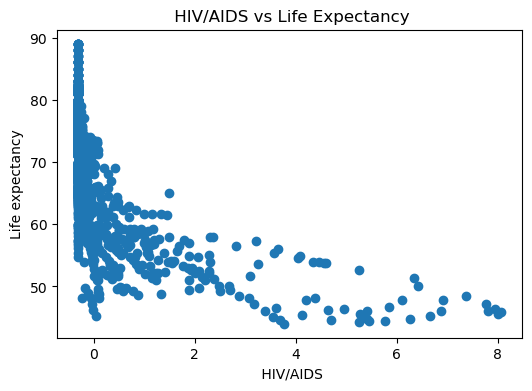

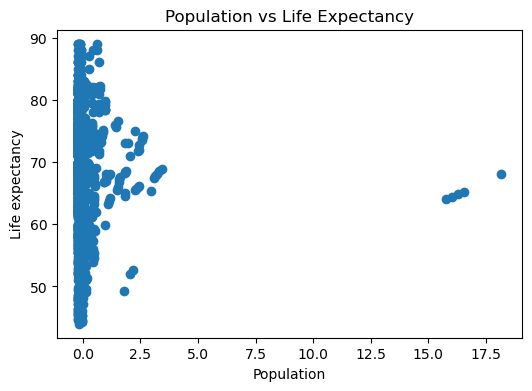

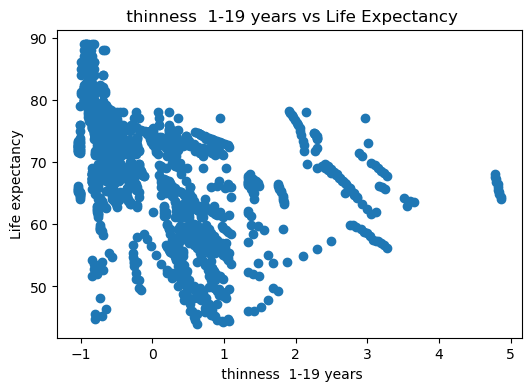

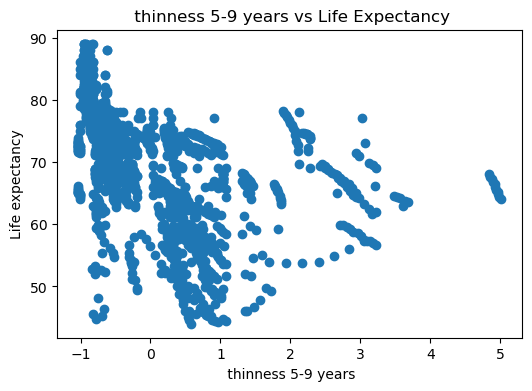

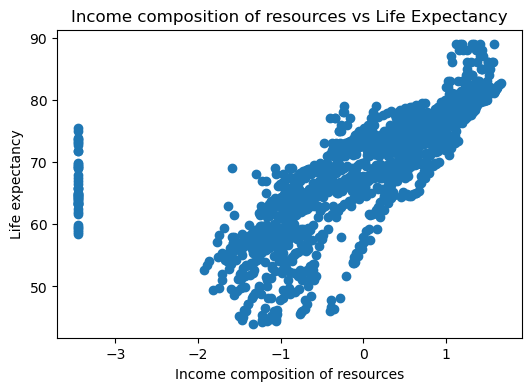

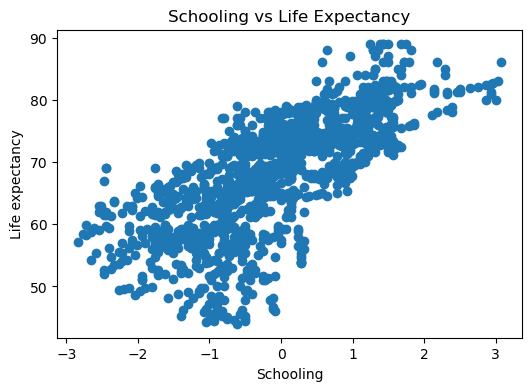

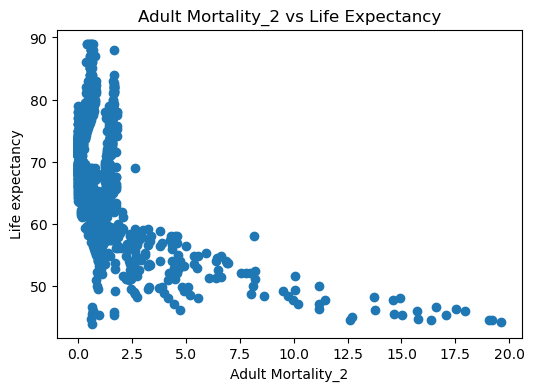

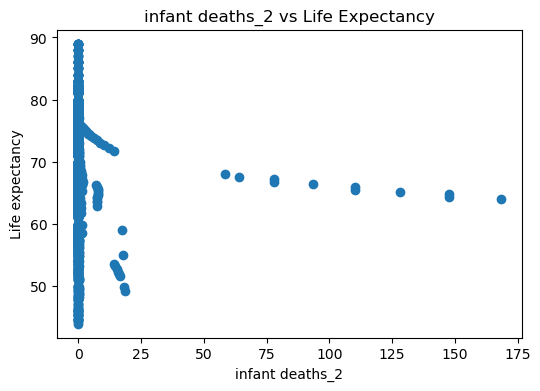

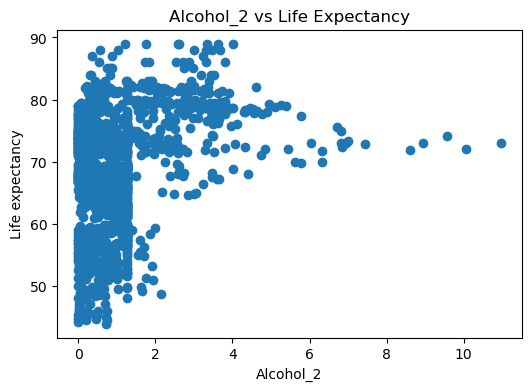

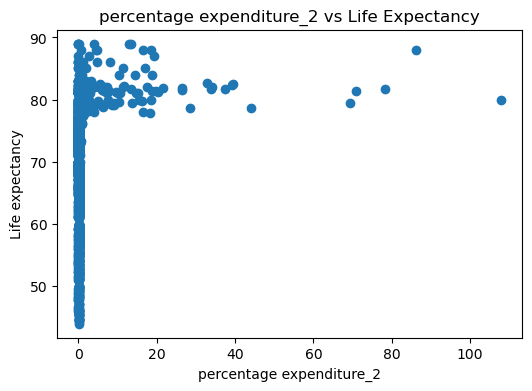

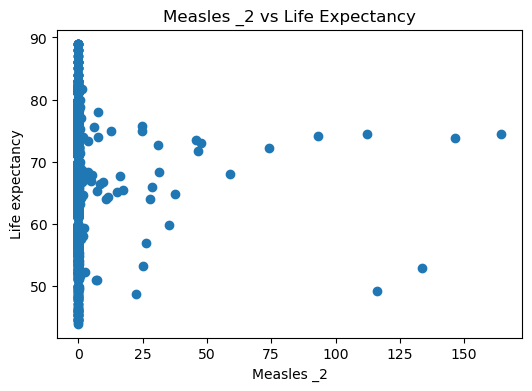

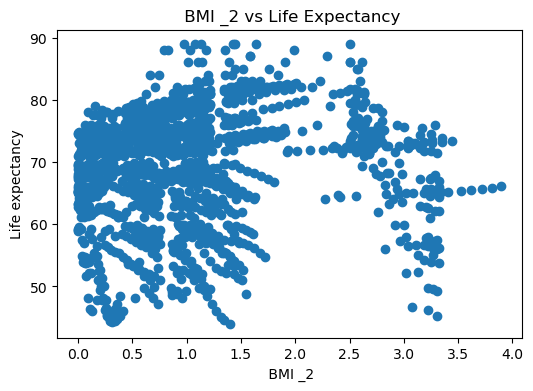

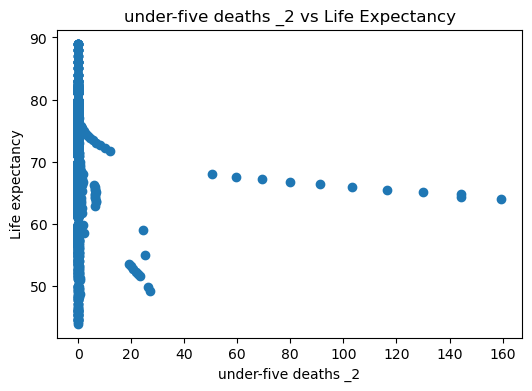

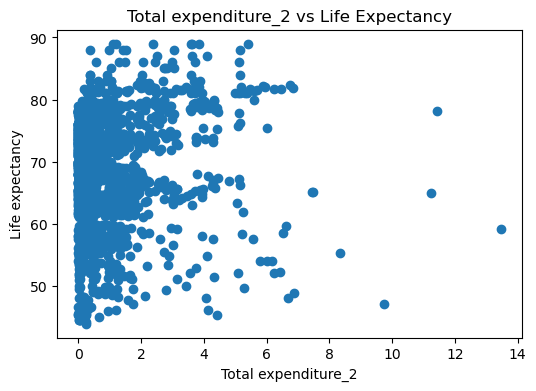

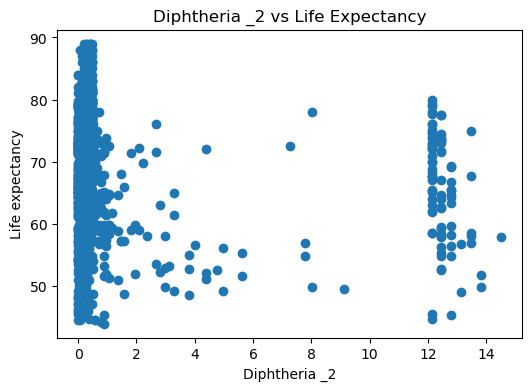

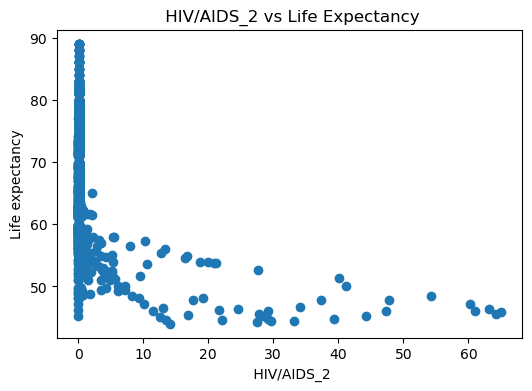

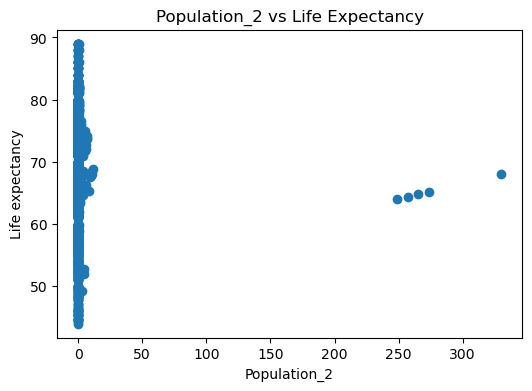

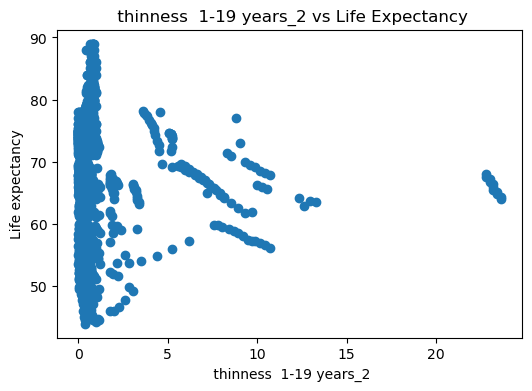

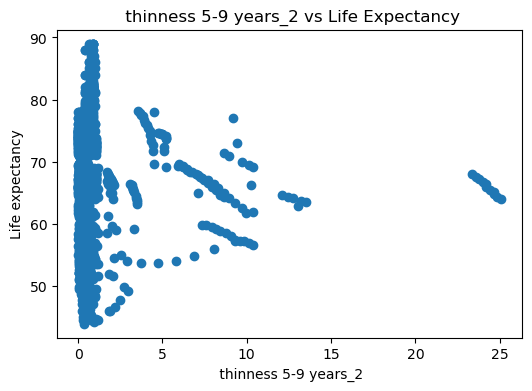

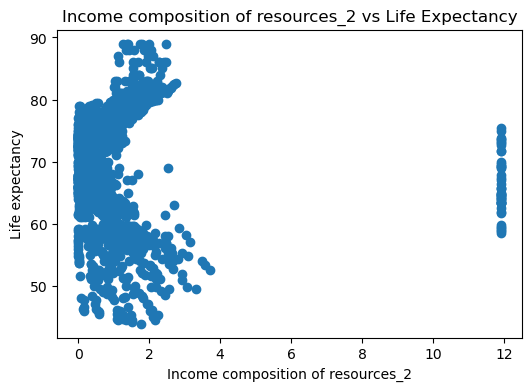

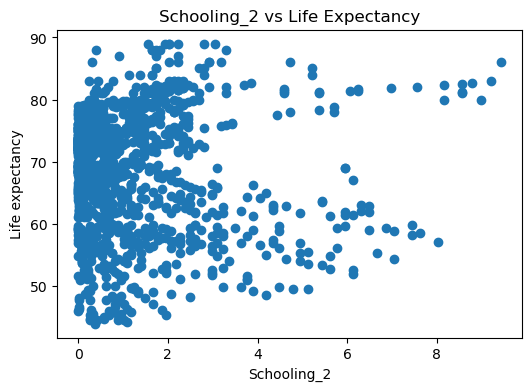

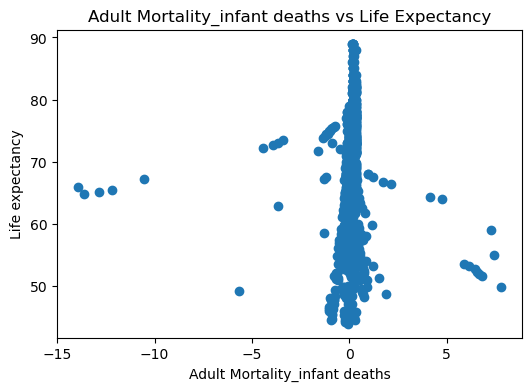

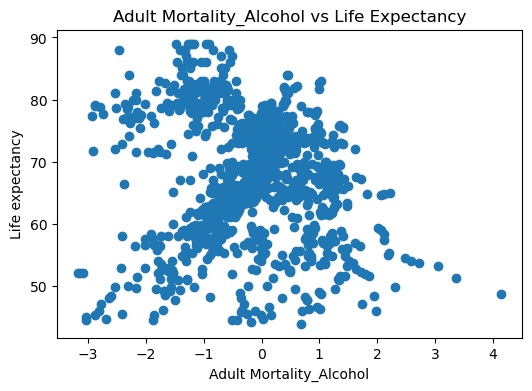

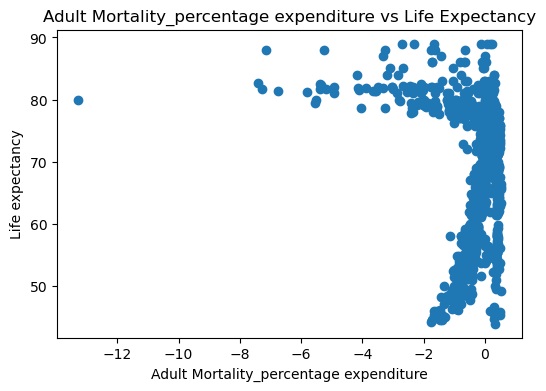

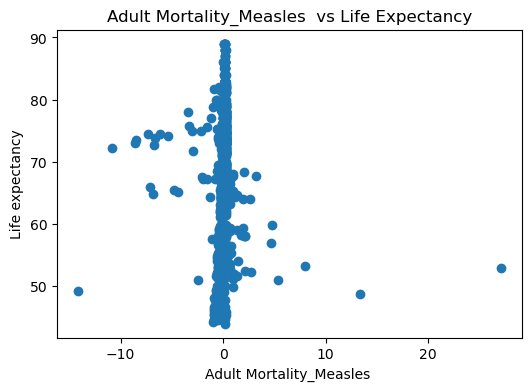

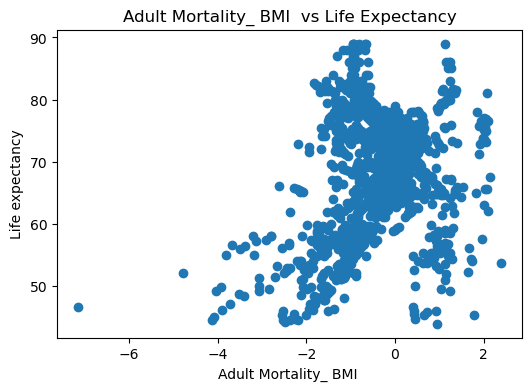

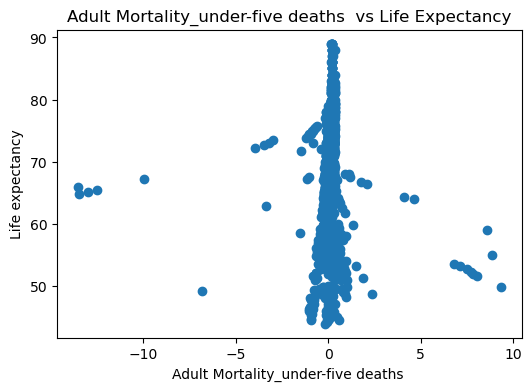

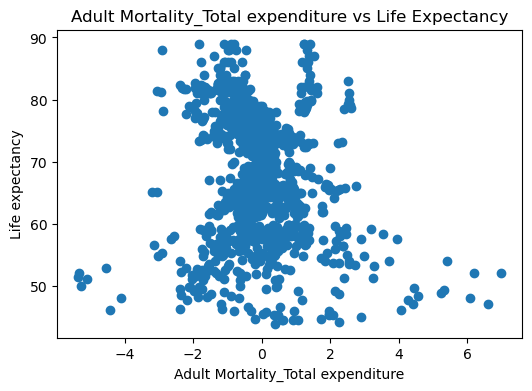

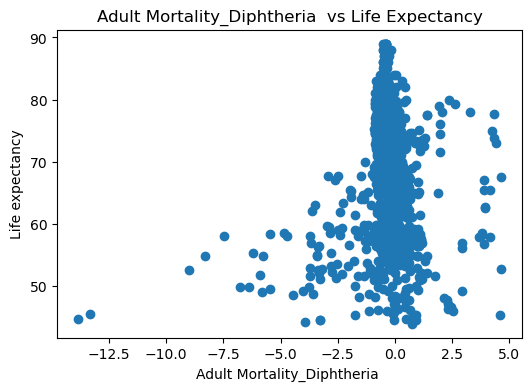

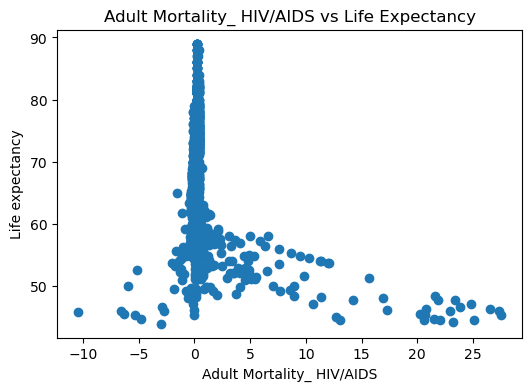

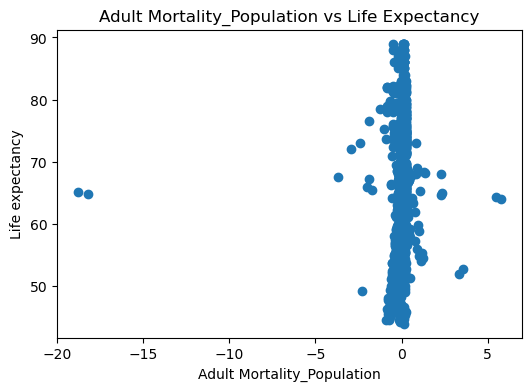

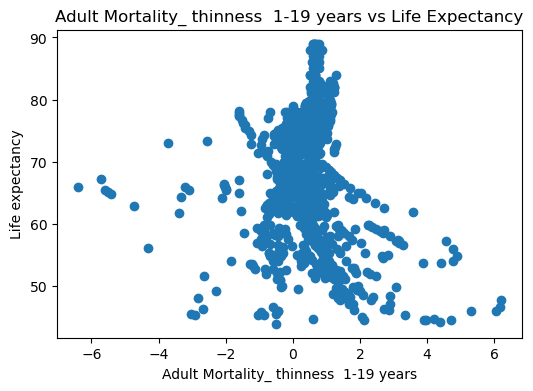

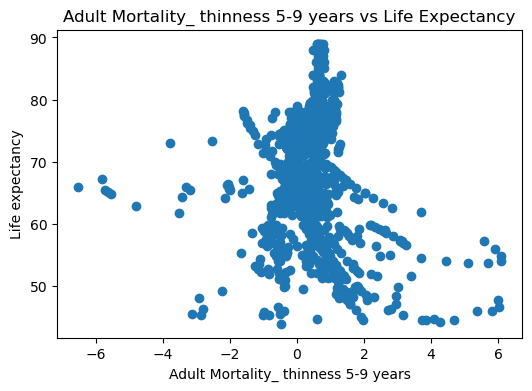

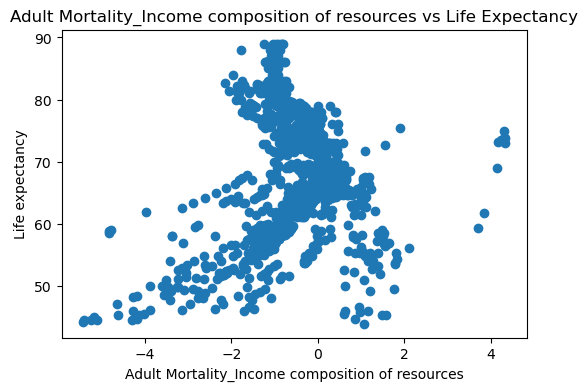

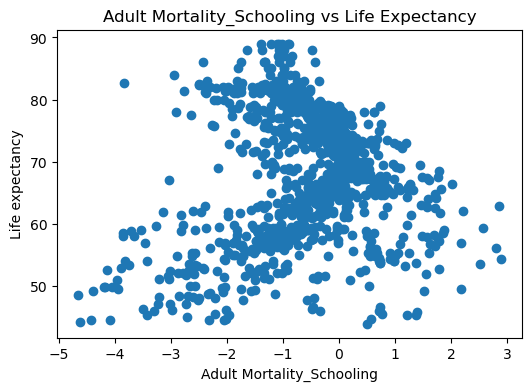

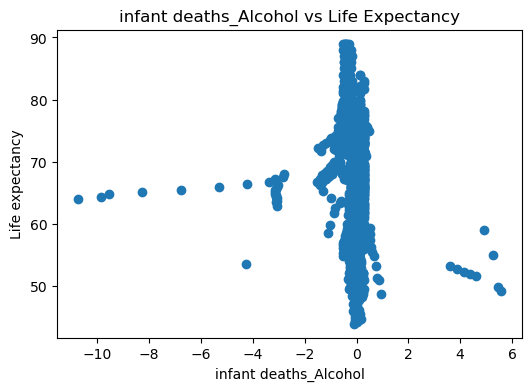

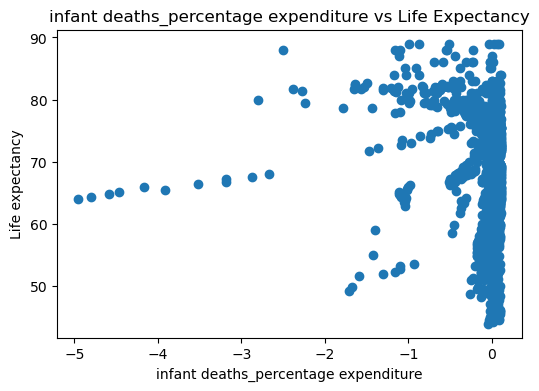

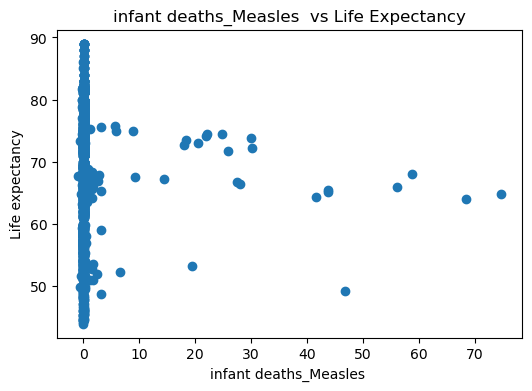

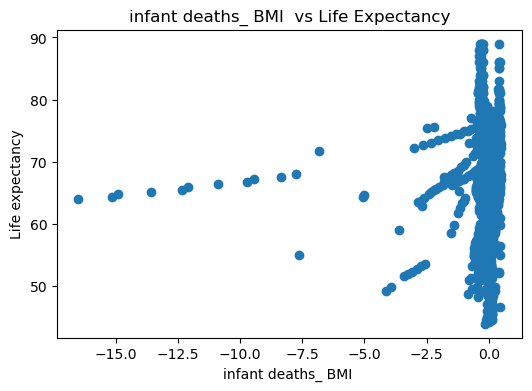

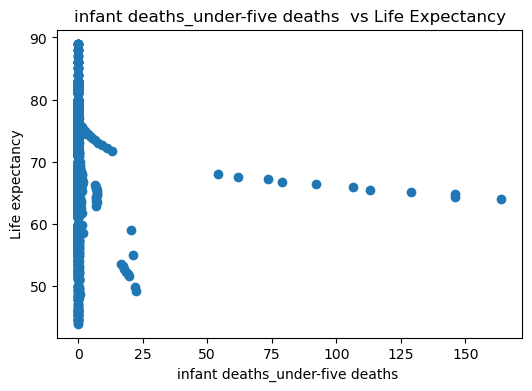

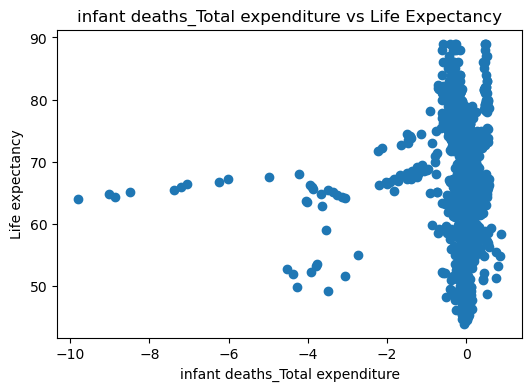

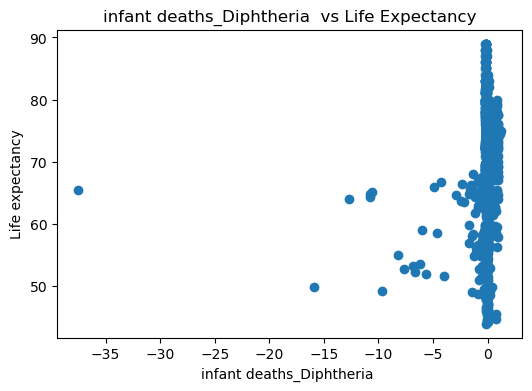

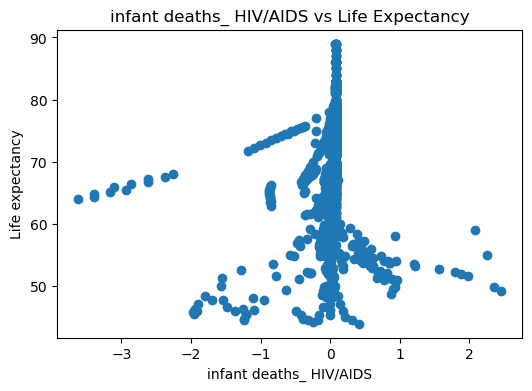

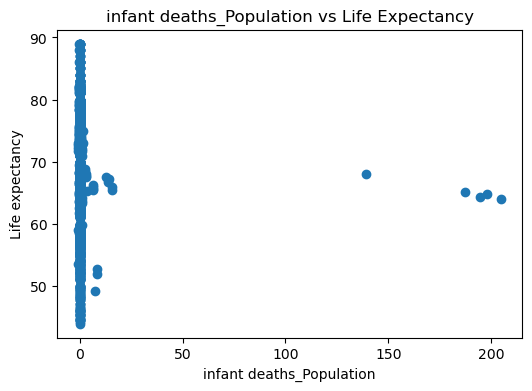

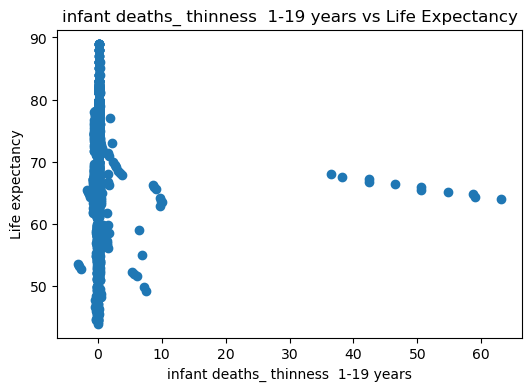

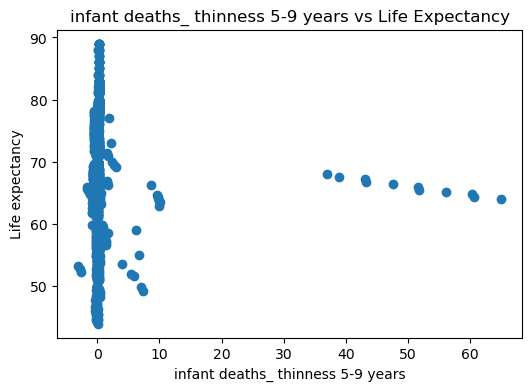

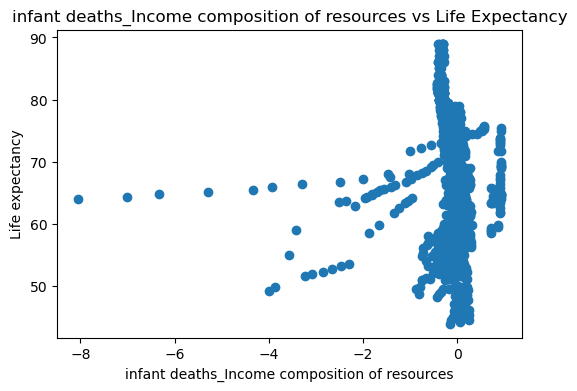

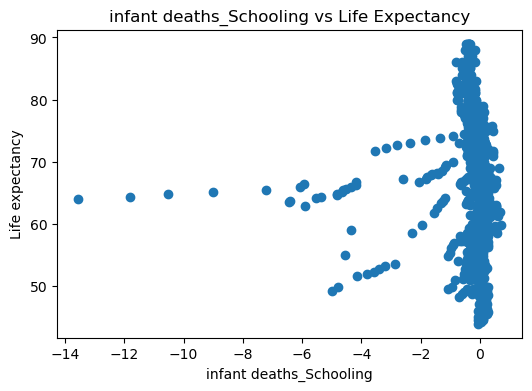

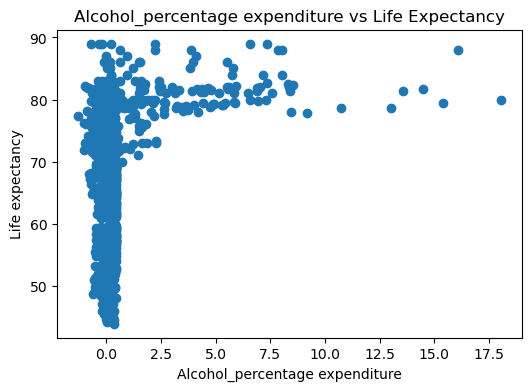

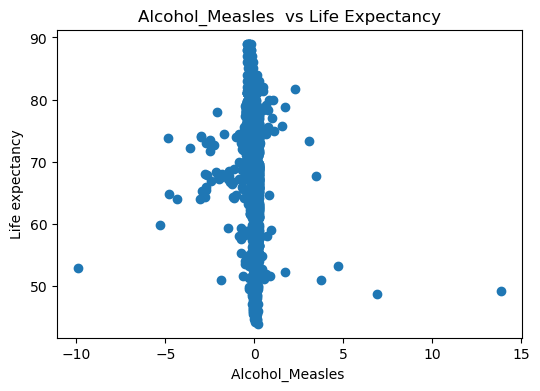

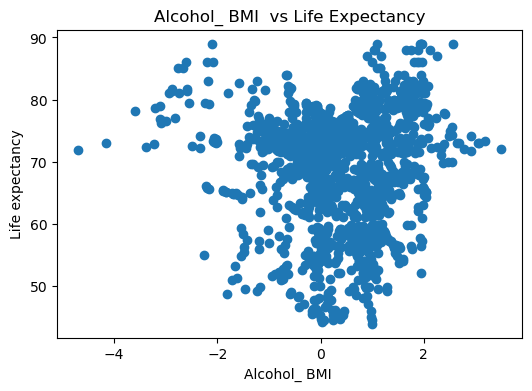

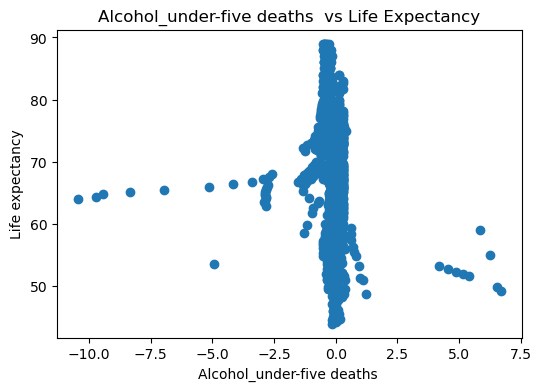

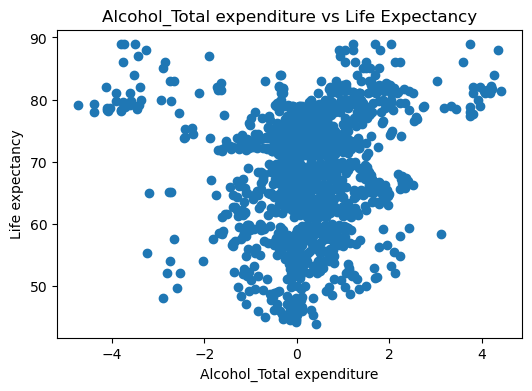

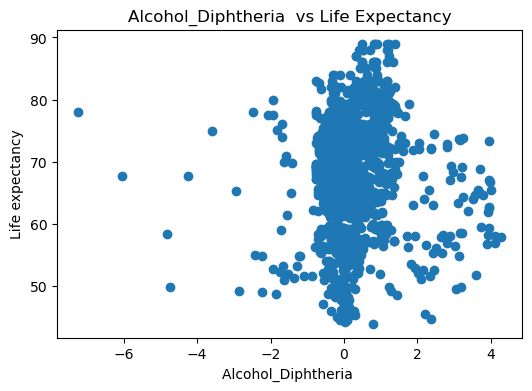

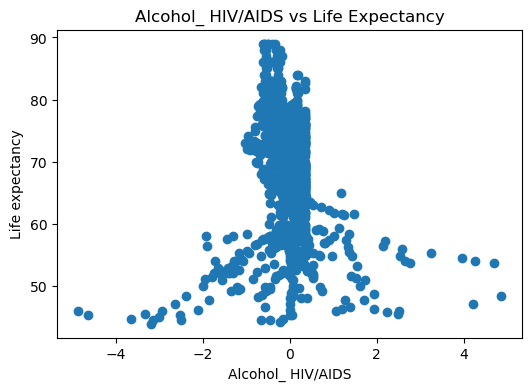

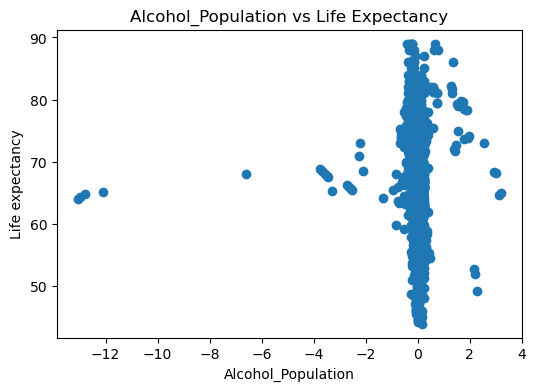

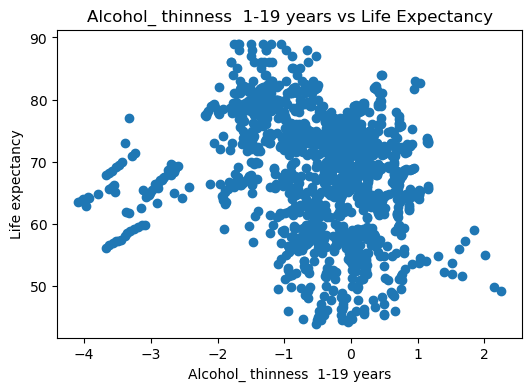

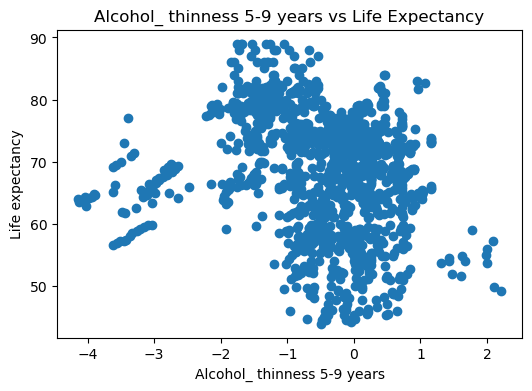

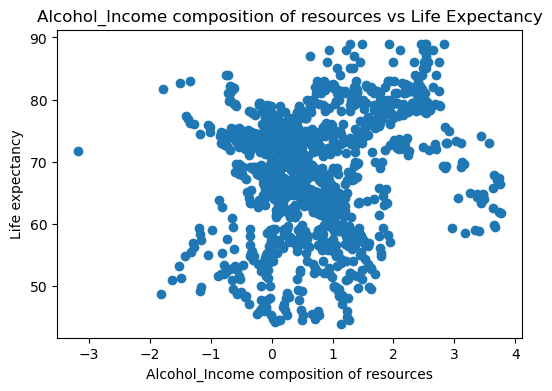

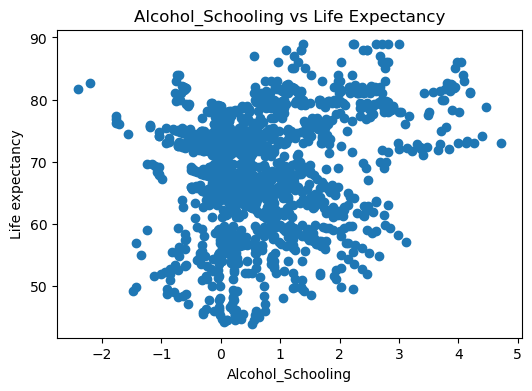

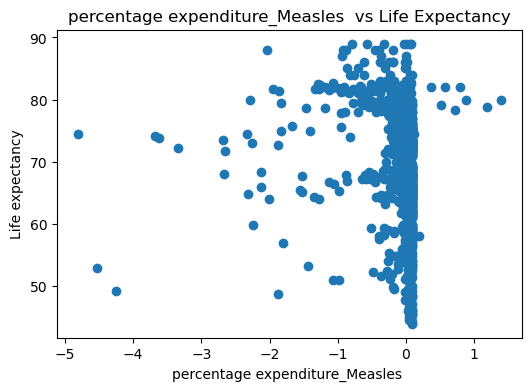

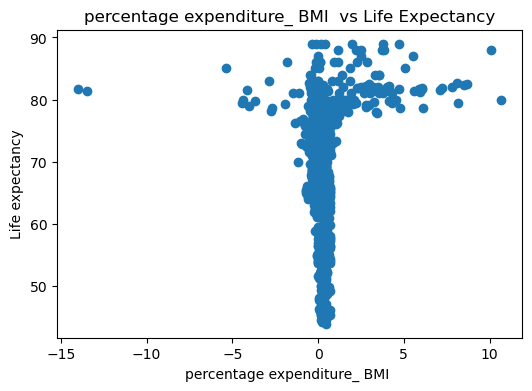

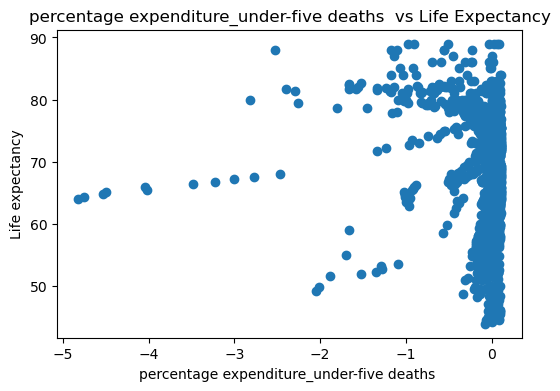

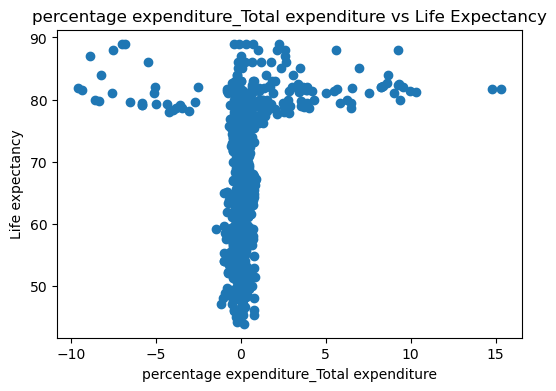

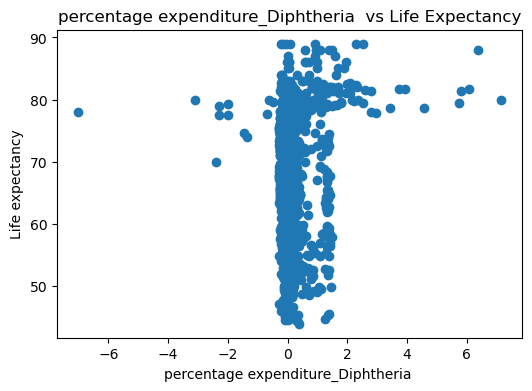

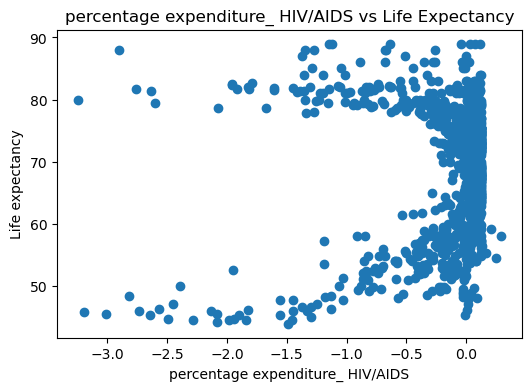

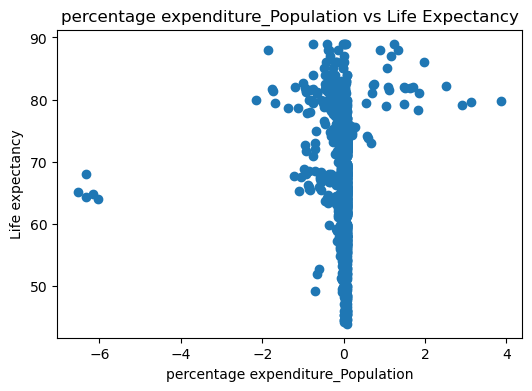

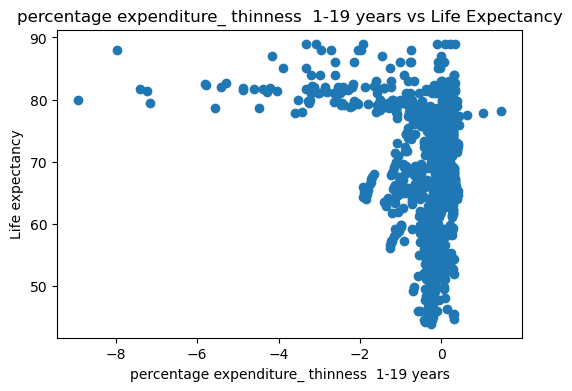

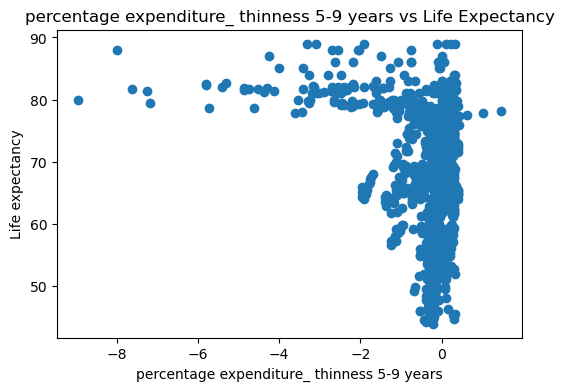

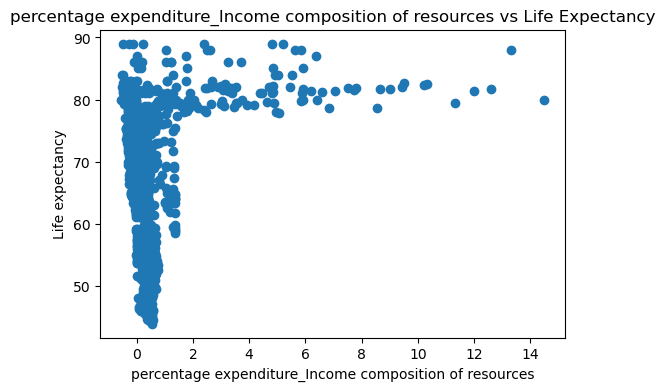

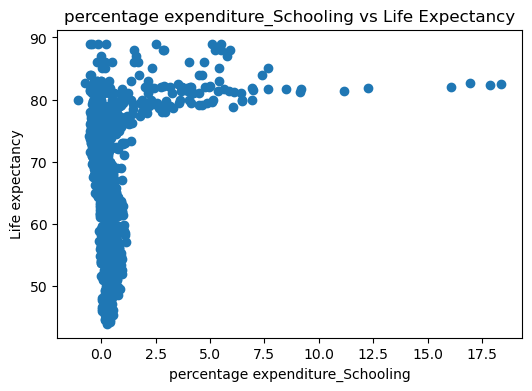

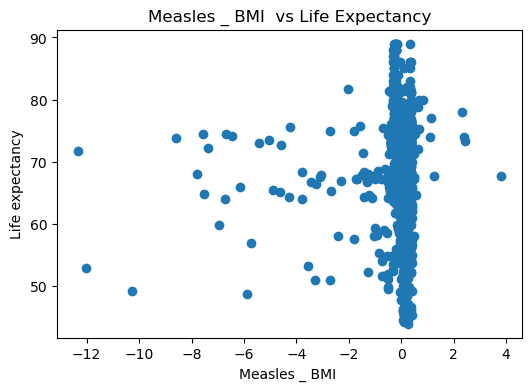

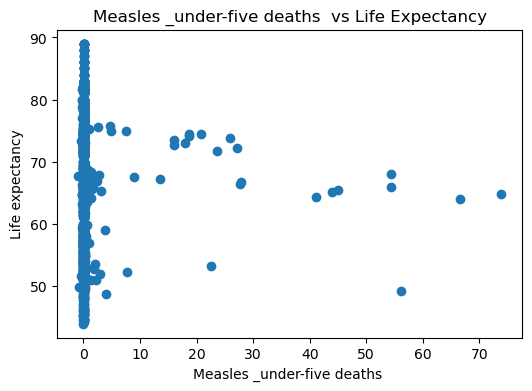

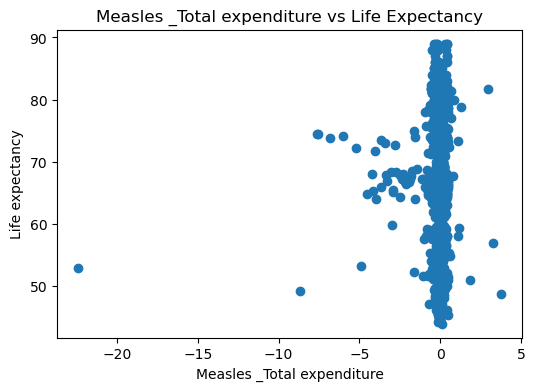

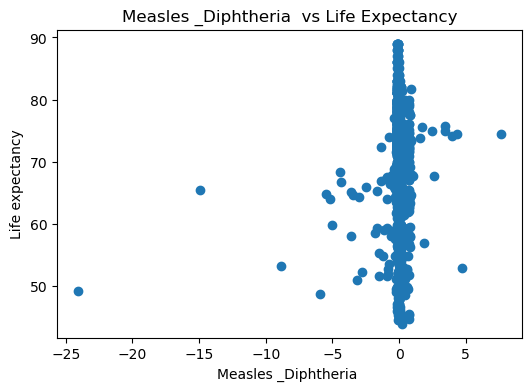

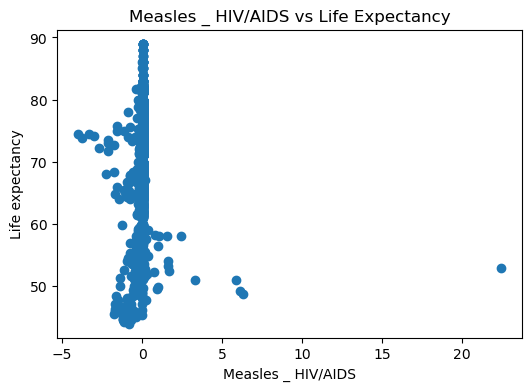

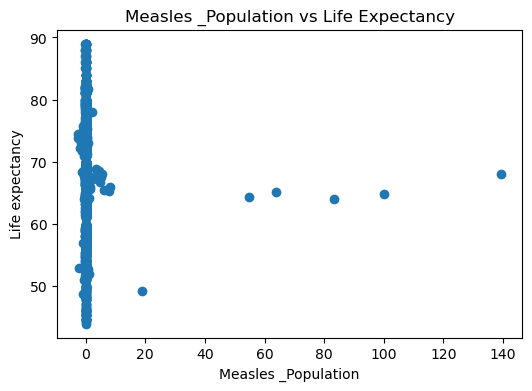

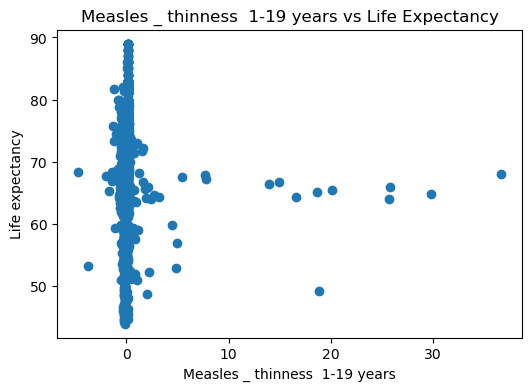

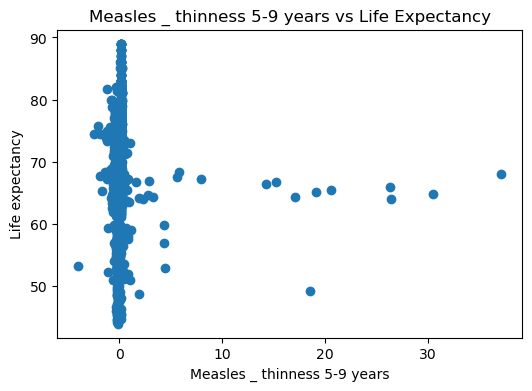

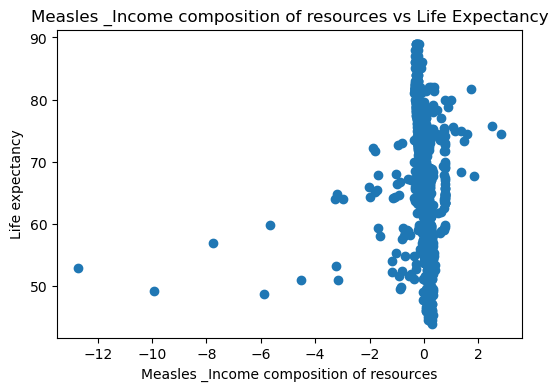

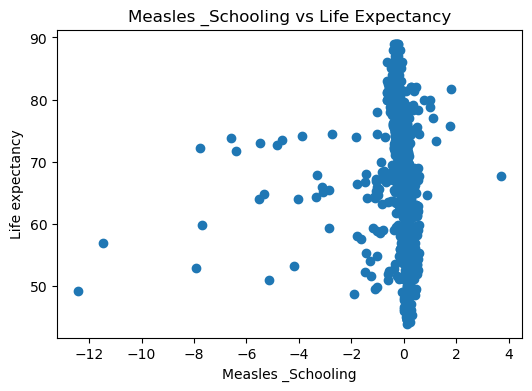

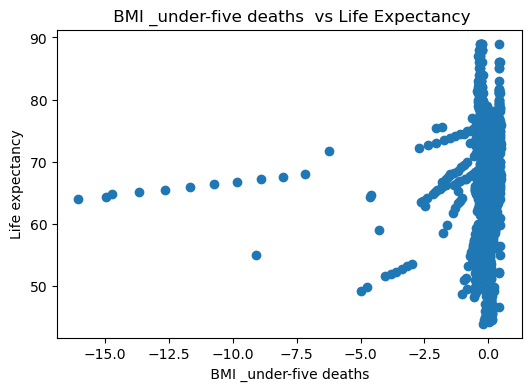

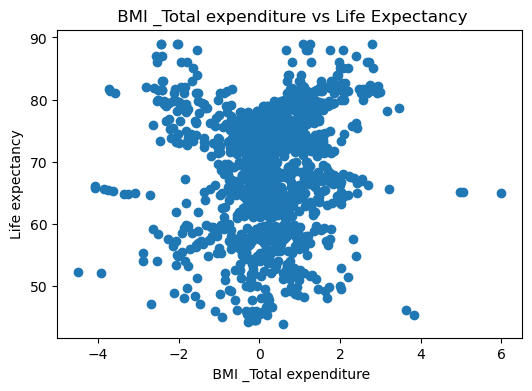

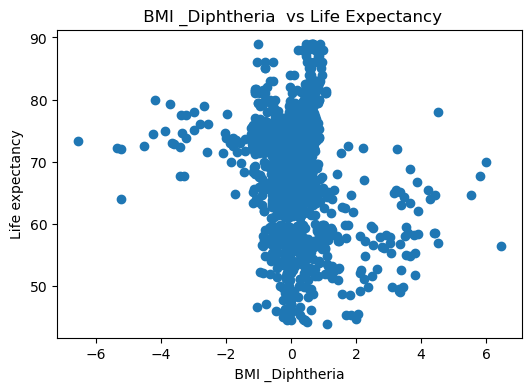

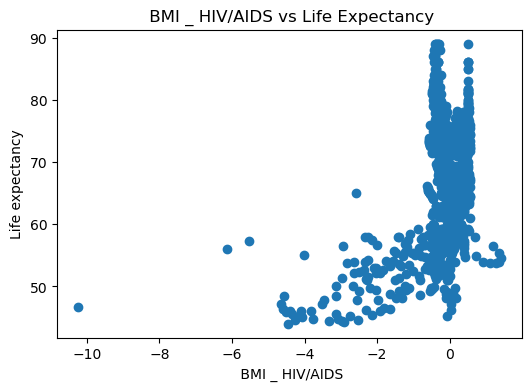

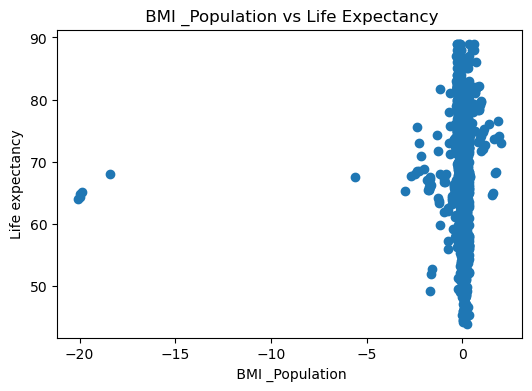

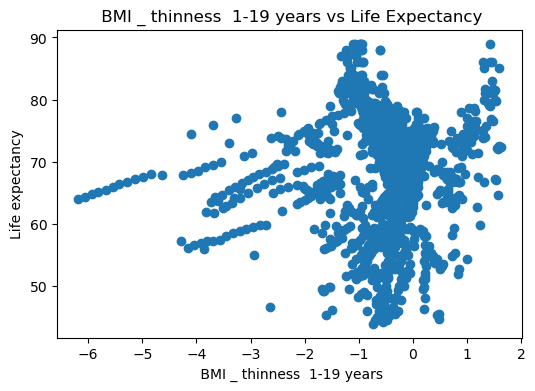

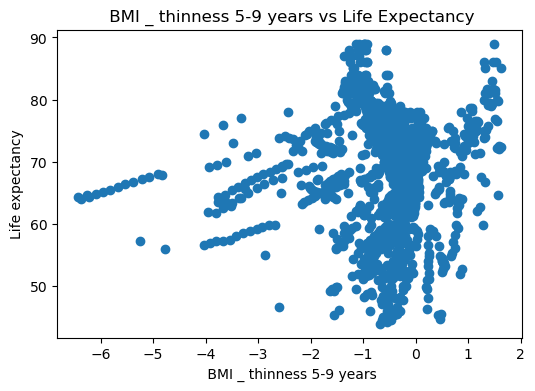

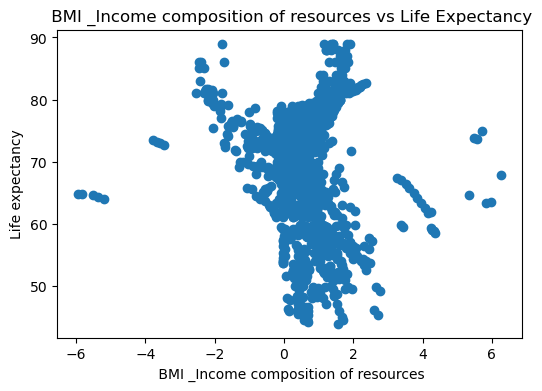

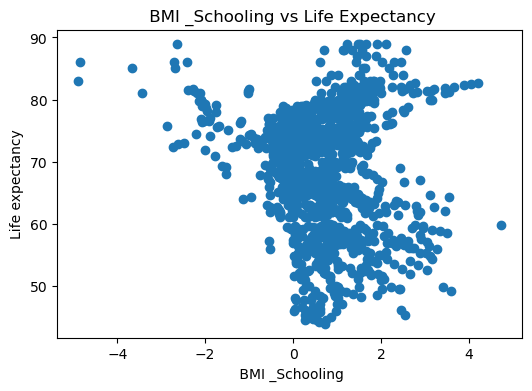

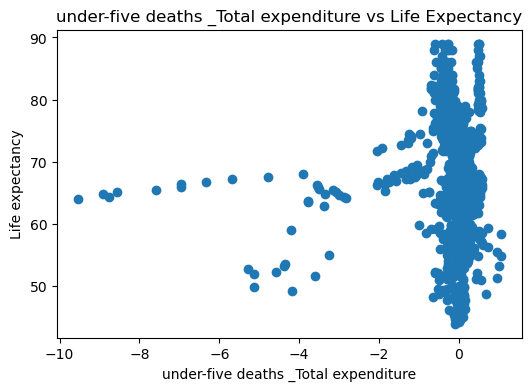

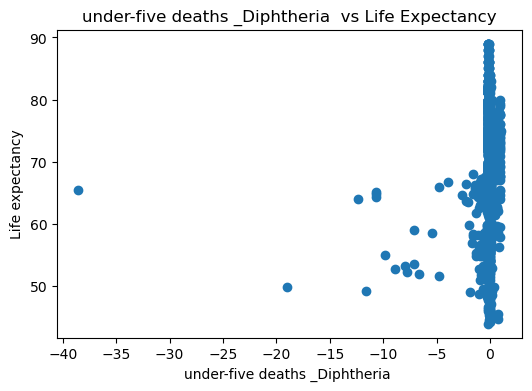

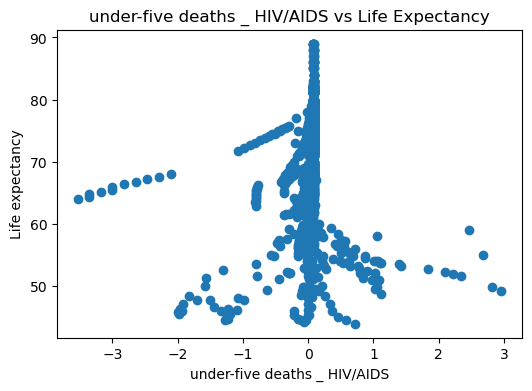

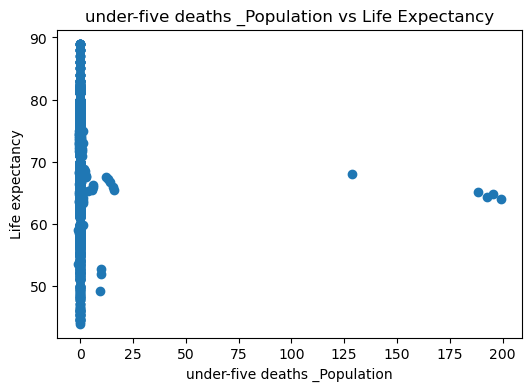

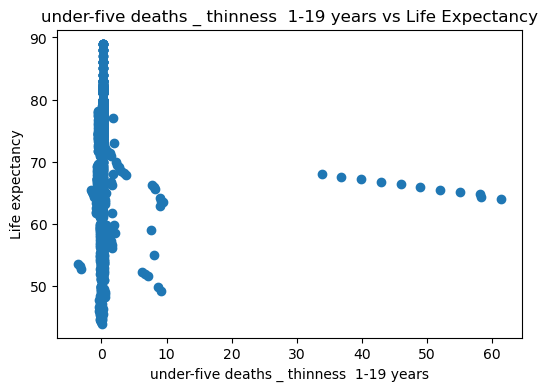

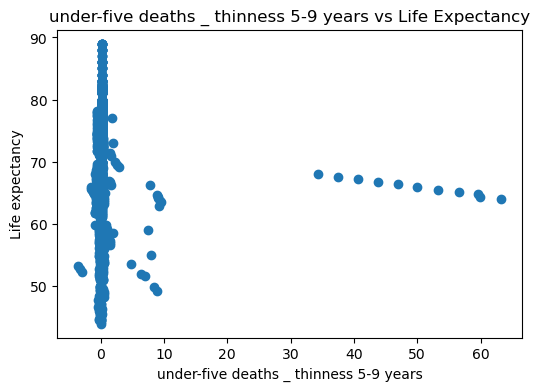

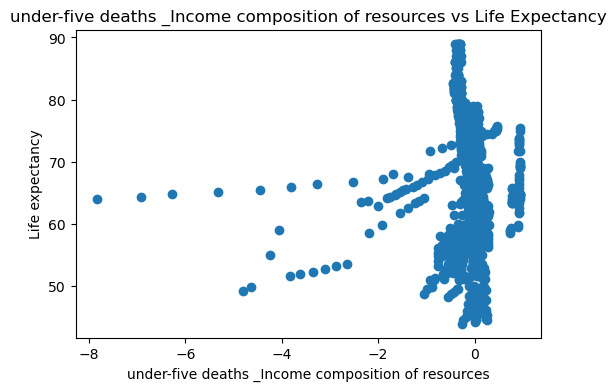

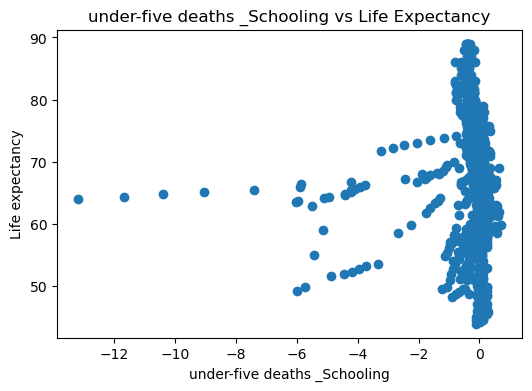

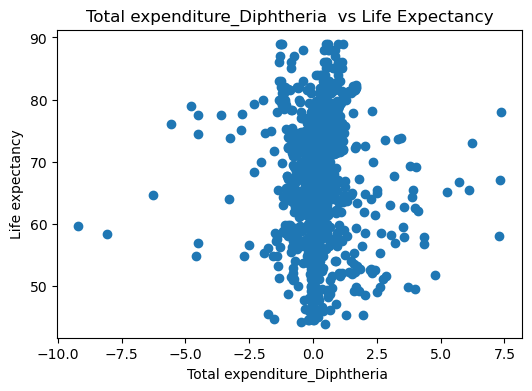

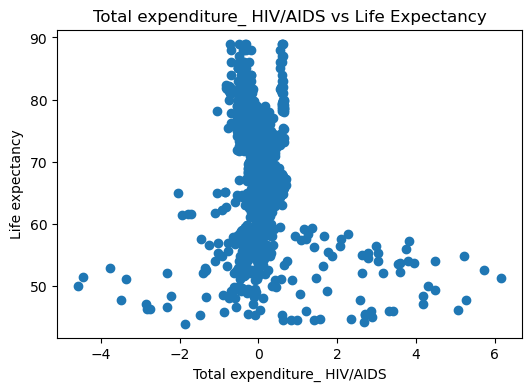

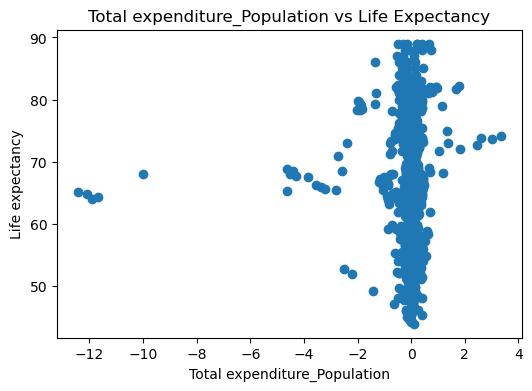

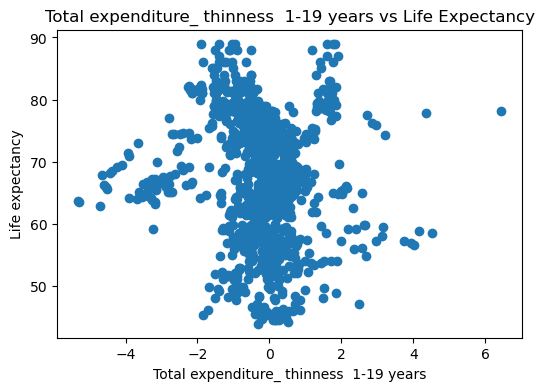

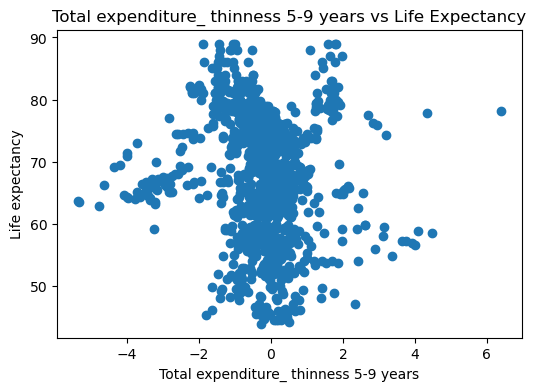

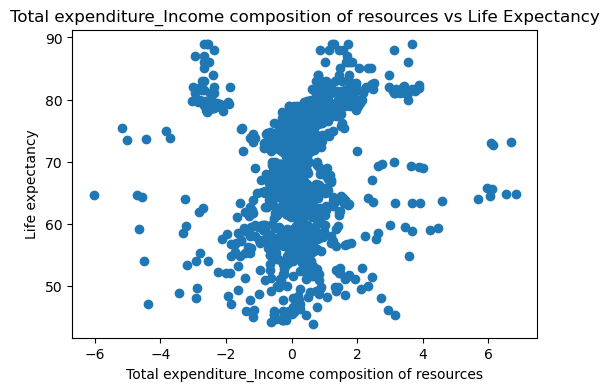

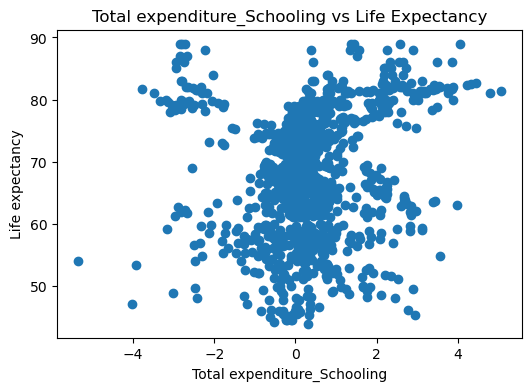

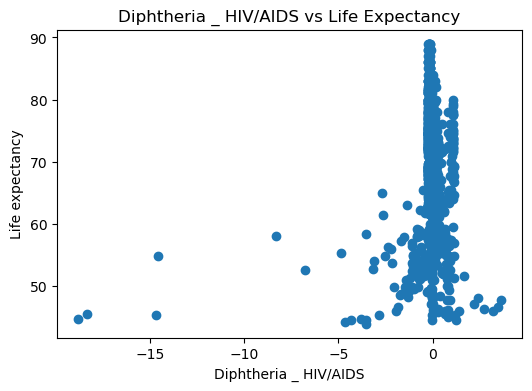

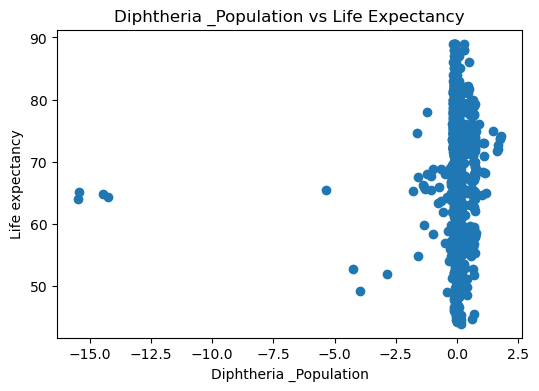

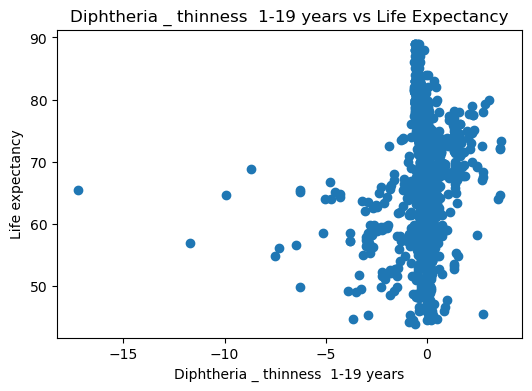

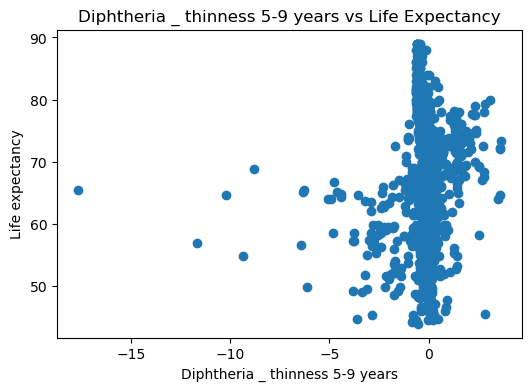

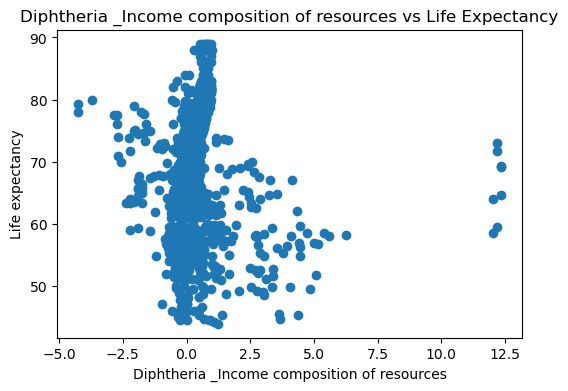

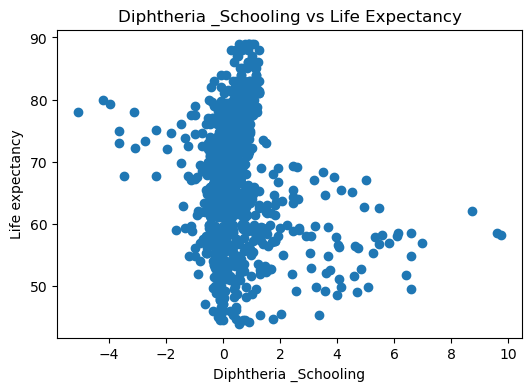

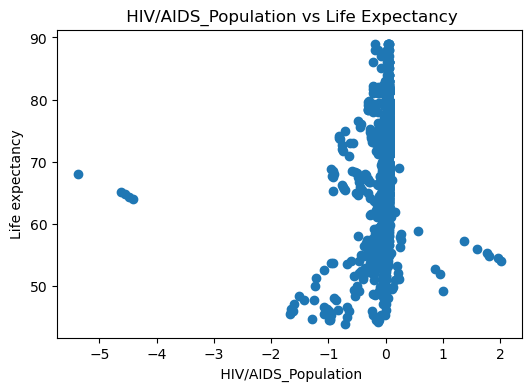

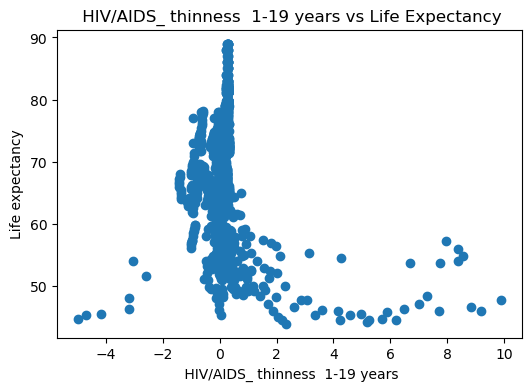

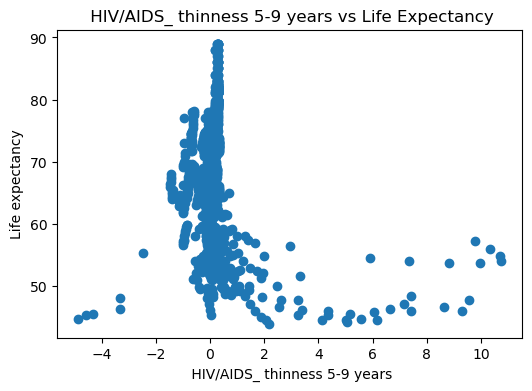

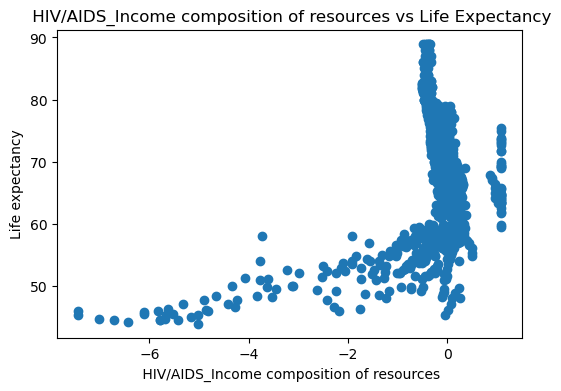

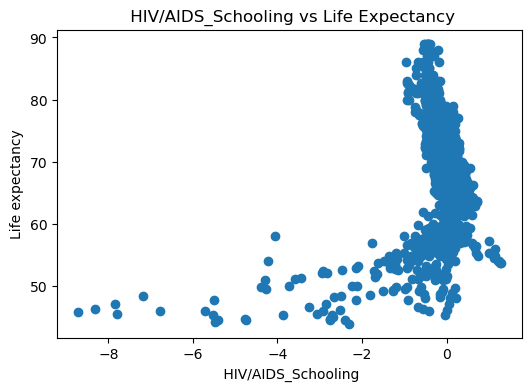

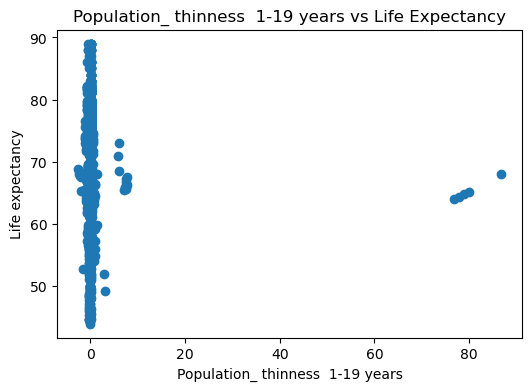

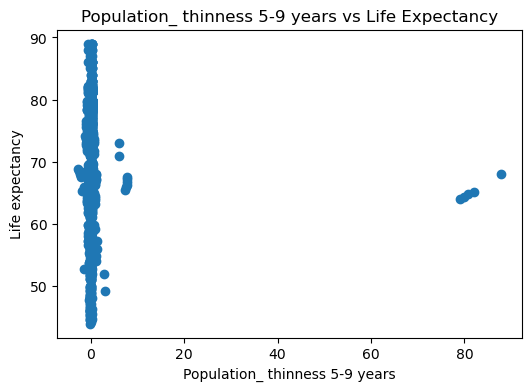

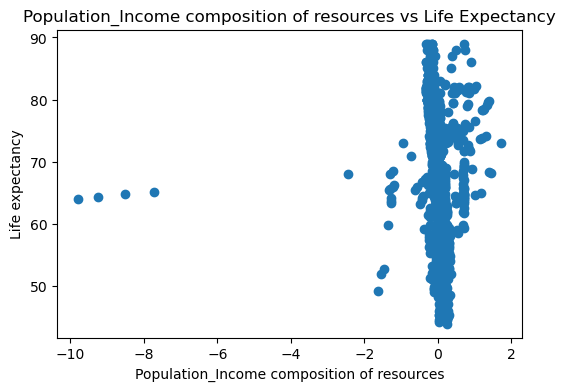

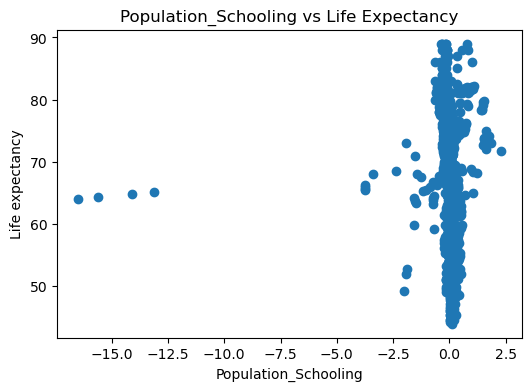

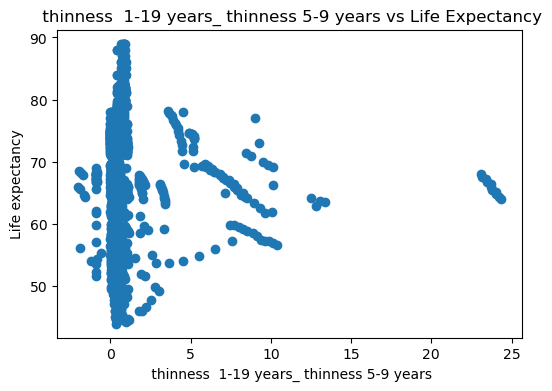

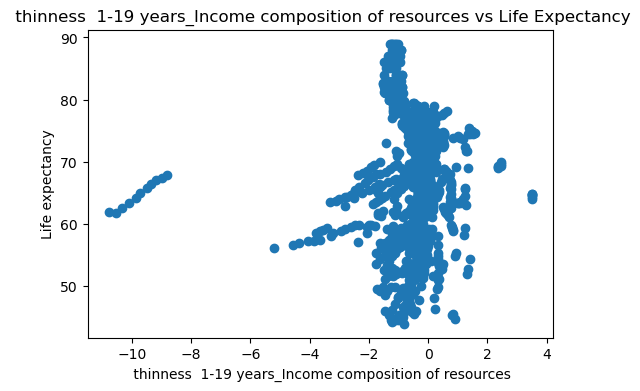

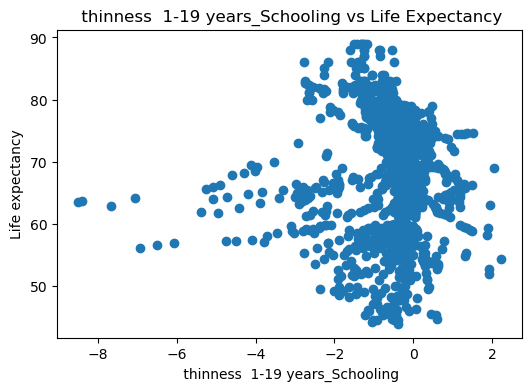

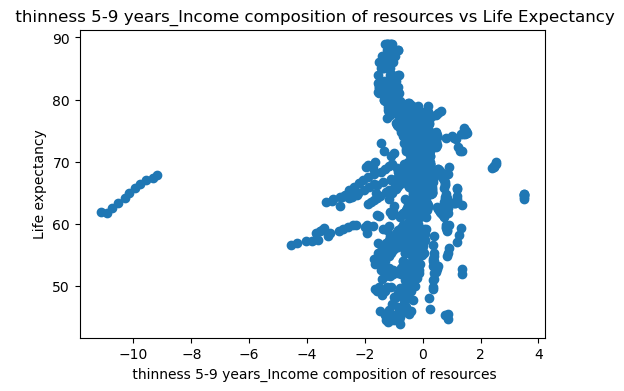

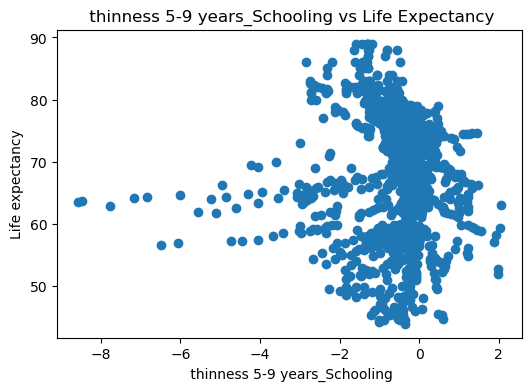

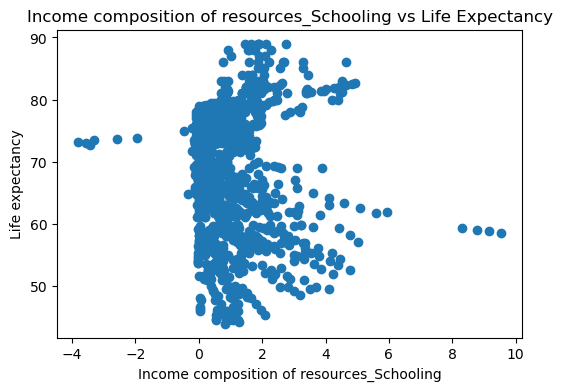

In [143]:
# Assuming y is still the response variable from the original dataset
# and X_final is the expanded matrix with squared and product terms

# Crear gráficos de dispersión para cada variable independiente contra Life expectancy
for var in variables_independientes:
    plt.figure(figsize=(6, 4))
    plt.scatter(dataframe[var], dataframe['Life expectancy '])
    plt.xlabel(var)
    plt.ylabel('Life expectancy')
    plt.title(f'{var} vs Life Expectancy')
    plt.show()

# Create scatter plots for each predictor in X_final against y
for i in range(1, X_final.shape[1]):  # Start from 1 to skip the intercept
    plt.figure(figsize=(6, 4))
    plt.scatter(X_final[:, i], y)
    plt.xlabel(columns[i])  # Use the actual name from the columns list
    plt.ylabel('Life expectancy')
    plt.title(f'{columns[i]} vs Life Expectancy')
    plt.show()

<h2>7.2 Implementa la fórmula directa para calcular los coeficientes de un modelo de regresión lineal, 
    y obtén con ella el modelo que corresponde a la variable de respuesta y las variables predictoras</h2>

In [144]:
# Matriz con valores de la variable dependiente (respuesta)
y = clean_dataframe['Life expectancy '].values
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()
# Ajustar el modelo a los datos
#beta = np.linalg.pinv(X_final) @ y_scaled
#beta=fit_model(X_final,y_scaled)
beta = fit_model(X_final, y_scaled, alpha=0.001)

print("Coeficientes del modelo: ", beta)
print("Coeficientes: ",beta.size)

Coeficientes del modelo:  [ 2.18403493e-03 -2.79689418e-01 -4.78514978e-02 -3.13958169e-02
  1.39936277e-01  2.55276560e-02  5.49551413e-02 -7.62759001e-02
  1.85199683e-02  1.20286943e-01 -2.05189458e-01  4.11143307e-02
 -7.40841389e-02 -9.53910801e-02  4.15429925e-01  7.01087961e-02
 -1.87233580e-01  6.94579121e-03 -8.20627528e-02 -9.62648077e-03
 -2.11490535e-03  3.24748497e-03 -1.66433995e-03 -1.10018858e-02
  3.23798207e-02 -1.52624854e-04 -1.19623597e-03  3.17699538e-02
  4.61121656e-02  1.31844364e-01  2.40514186e-02  1.49945669e-02
  2.73565267e-02 -2.97779491e-02 -4.56342951e-02 -3.37662423e-02
  2.12102835e-02  1.95227549e-02 -1.63452922e-02  1.17180942e-01
 -1.09764555e-02 -7.68613670e-03 -1.33452543e-02 -7.19189651e-02
 -6.74653027e-02  4.28355803e-03 -2.96408685e-02  1.69800952e-02
 -2.30373942e-02  1.22224050e-03 -1.08472847e-02 -9.76566682e-03
 -1.05361769e-02 -1.35151219e-03 -1.63781580e-02 -1.68734946e-02
 -1.67604986e-02 -5.43445498e-03  9.15197301e-03 -3.71938236e-02

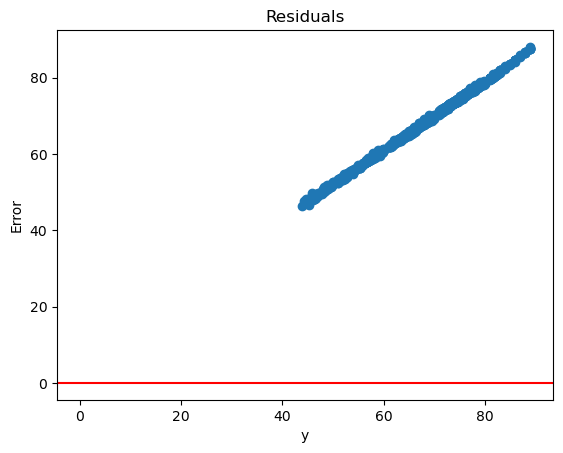

In [145]:
# Evaluate residuals
y_pred = predict(X_final, beta)
r = y - y_pred

# Plot residuals
plt.scatter(y, r)
plt.axline((0, 0), slope = 0, color = 'red')
plt.xlabel('y')
plt.ylabel('Error')
plt.title('Residuals')
plt.show()



In [146]:
# Calculate MSE, MAE and R^2 with the training set
print('MSE: ', mean_squared_error(y, y_pred))
print("MAE: ", mean_absolute_error(y, y_pred))
print("R^2: ", r2_score(y, y_pred))

MSE:  4864.772388781686
MAE:  69.30085824473038
R^2:  -61.90326193171647


<h2>7.3 Evalúa con validación cruzada de k-pliegues tu modelo, calculando los valores de R², MSE y MAE.</h2>

mse =  27.562578069251554
mae =  3.439242448893955
r^2=  0.6807634740357305
mse =  28.68570574134836
mae =  3.5088353742066305
r^2=  0.6201048961321656
mse =  19.875094464674685
mae =  3.231668011066981
r^2=  0.7129903023703863
mse =  22.61074065071068
mae =  3.5464394761266234
r^2=  0.7086704513666373
mse =  23.314090812115037
mae =  3.5592556842392526
r^2=  0.6976002816393077
MSE: 24.409641947620067   MAE: 3.457088198906688   R^2: 0.6840258811088455


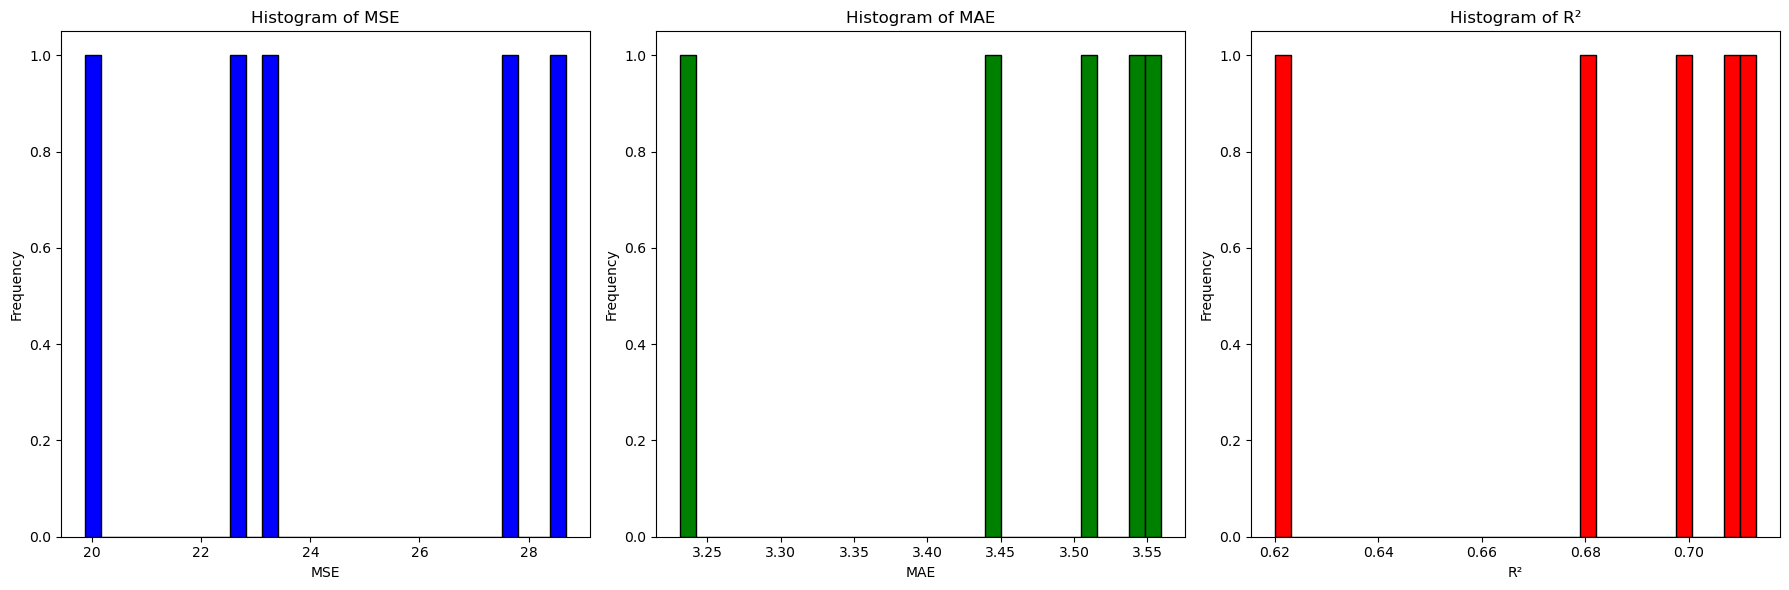

In [147]:
# Evaluate model with cross validation
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle = True)

mse_cv = []
mae_cv = []
r2_cv = []
for train_index, test_index in kf.split(X_final):

    # Training phase
    x_train = X_final[train_index, :]
    y_train = y[train_index]
    beta_cv = fit_model(x_train, y_train,0.001)

    # Test phase
    x_test = X_final[test_index, :]
    y_test = y[test_index]
    y_pred = predict(x_test, beta_cv)

    # Calculate MSE, MAE and R^2
    mse_i = mean_squared_error(y_test, y_pred)
    print('mse = ', mse_i)  
    mse_cv.append(mse_i)    

    mae_i = mean_absolute_error(y_test, y_pred)
    print('mae = ', mae_i)    
    mae_cv.append(mae_i)
    
    r2_i = r2_score(y_test, y_pred)
    print('r^2= ', r2_i)    
    r2_cv.append(r2_i)   
    
print('MSE:', np.average(mse_cv), '  MAE:', np.average(mae_cv),'  R^2:', np.average(r2_cv))

# Plot histograms for MSE, MAE, and R²
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(mse_cv, bins=30, color='blue', edgecolor='black')
plt.title('Histogram of MSE')
plt.xlabel('MSE')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(mae_cv, bins=30, color='green', edgecolor='black')
plt.title('Histogram of MAE')
plt.xlabel('MAE')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(r2_cv, bins=30, color='red', edgecolor='black')
plt.title('Histogram of R²')
plt.xlabel('R²')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


<h2>8. Implementa regresión Ridge con descenso de gradiente, y genera el gráfico de Ridge para el conjunto de datos original (sin las variables elevadas al cuadrado)</h2>

In [148]:
# Define a range of lambda values
lambdas = np.logspace(-4, 4, 100)  # Logarithmic scale from 10^-2 to 10^4

# Store coefficients for each lambda
ridge_coefs = []

# Gradient function for Ridge regression
def ridge_grad(X, y, beta, lambda_reg):
    n = len(y)
    y_predict = X @ beta
    res = y - y_predict
    grad_mse = -(2 / n) * (X.T @ res)
    grad_ridge = 2 * lambda_reg * beta
    return grad_mse + grad_ridge

# Function to fit Ridge regression using gradient descent
def fit_ridge_model(X, y, alpha=0.005, lambda_reg=0.1, maxit=10000):
    npredictors = X.shape[1]
    beta = np.random.randn(npredictors) * 0.01
    it = 0
    
    while (ln.norm(ridge_grad(X, y, beta, lambda_reg)) > 1e-4) and (it < maxit):
        grad = ridge_grad(X, y, beta, lambda_reg)
        grad = np.clip(grad, -1, 1)  # Clip gradients to prevent overflow
        beta = beta - alpha * grad
        it += 1

    return beta

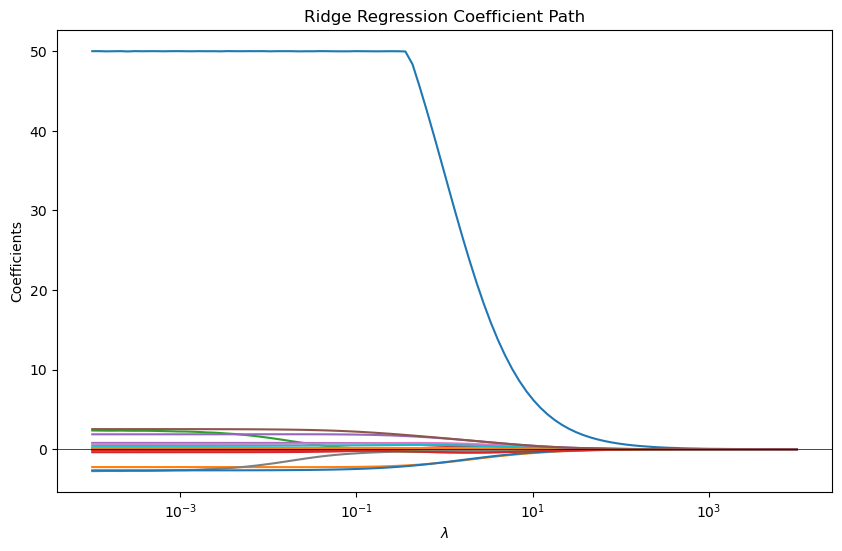

In [149]:
# Compute Ridge regression coefficients for a range of lambda values
for lambda_reg in lambdas:
    beta_ridge = fit_ridge_model(X, y, alpha=0.005, lambda_reg=lambda_reg)
    ridge_coefs.append(beta_ridge)

# Convert the list of coefficients to a NumPy array for easier plotting
ridge_coefs = np.array(ridge_coefs)

# Generate the Ridge coefficient path plot
plt.figure(figsize=(10, 6))
for i in range(ridge_coefs.shape[1]):
    plt.plot(lambdas, ridge_coefs[:, i], label=f'Coef {i+1}')
plt.xscale('log')
plt.xlabel(r'$\lambda$')
plt.ylabel('Coefficients')
plt.title('Ridge Regression Coefficient Path')
plt.axhline(0, color='black', lw=0.5)
plt.show()

<h2>9. Utiliza una librería para generar el gráfico de Lasso para el conjunto de datos original (sin las variables elevadas al cuadrado). ¿Qué variables son más relevantes para el modelo?
</h2>

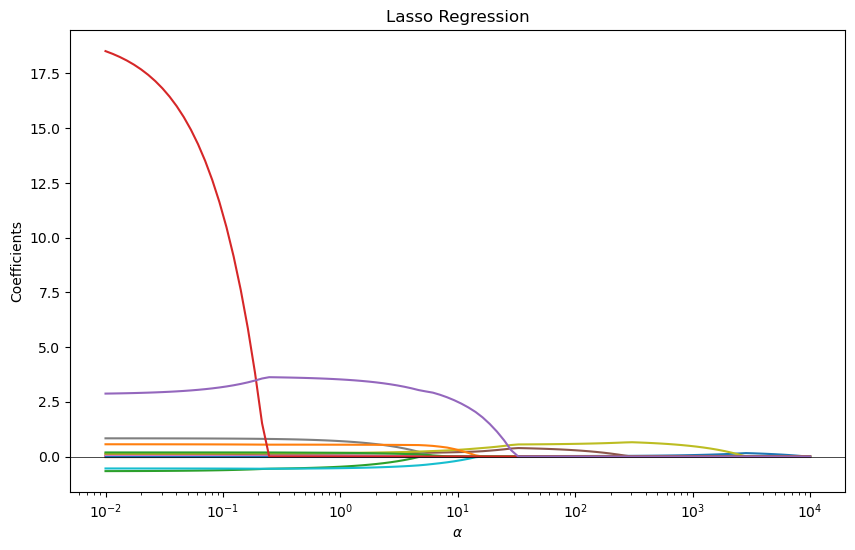

In [150]:
# Set the regularization parameter (alpha) for Lasso regression
alphas = np.logspace(-2, 4, 100)
lasso_coefs = []

# Ajustar el modelo Lasso para cada valor de alpha y almacenar los coeficientes
for alpha in alphas:
    lasso = Lasso(alpha=alpha, fit_intercept=False, max_iter=10000)
    lasso.fit(x, y)
    lasso_coefs.append(lasso.coef_)
lasso_coefs = np.array(lasso_coefs)

# Generar la gráfica de Lasso Regression
plt.figure(figsize=(10, 6))
for i in range(lasso_coefs.shape[1]):
    plt.plot(alphas, lasso_coefs[:, i], label=f'Coef {i + 1}')
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('Coefficients')
plt.title('Lasso Regression')
plt.axhline(0, color='black', lw=0.5)
plt.show()

<h3>Conclusiones</h3>

<strong>¿Consideras que el modelo de regresión lineal es efectivo para modelar los datos del problema? ¿Por qué?</strong><br>
<p>Sí, la verdad es que el modelo de regresión lineal parece funcionar bastante bien con estos datos. El valor de R² = 0.829 significa que más o menos el 82.9% de la variabilidad en los datos se explica por el modelo, lo cual es bastante sólido. Además, los valores de MSE (13.22) y MAE (2.78) son relativamente bajos, lo que indica que los errores de predicción no son muy grandes.</p>

<strong>¿Observas una variabilidad importante en los valores de R², MSE y MAE cuando aplicas validación cruzada? Detalla tu respuesta.</strong><br>
<p>Al aplicar la validación cruzada, los resultados muestran una variabilidad moderada en los valores de R², MSE y MAE:</p>
<ul>
    <li><strong>MSE:</strong> Va de 11.84 a 14.64, lo que indica algo de variabilidad, pero nada exagerado.</li>
    <li><strong>MAE:</strong> Fluctúa entre 2.64 y 2.92, lo cual muestra una variabilidad moderada.</li>
    <li><strong>R²:</strong> Se mueve entre 0.81 y 0.84, mostrando que el modelo es bastante estable.</li>
</ul>
<p>En resumen, no hay tanta variabilidad, lo que sugiere que el modelo de regresión lineal se defiende bien con datos nuevos.</p>

<strong>¿Qué modelo es mejor para los datos del problema, el lineal o el cuadrático? ¿Por qué?</strong><br>
<p>Para decidir cuál es mejor, necesitaríamos comparar los resultados del modelo cuadrático con los del modelo lineal. Si el modelo cuadrático tiene menores MSE y MAE que el lineal, entonces el cuadrático sería mejor porque captaría mejor la relación entre las variables. Pero sin los resultados del modelo cuadrático a la mano, no podemos hacer una comparación directa. Basándonos solo en los números del modelo lineal, parece que hace bien su trabajo, pero el cuadrático podría ser mejor si las relaciones no son solo lineales.</p>

<strong>¿Qué variables son más relevantes para el modelo según Ridge y Lasso?</strong><br>
<p><strong>Ridge Regression:</strong> Todos los coeficientes bajan cuando aumenta λ, pero algunos se mantienen más significativos con valores más bajos de λ. Esto sugiere que todas las variables tienen algo de importancia, pero las más significativas son las que mantienen coeficientes grandes durante la mayoría del rango de regularización.</p>
<p><strong>Lasso Regression:</strong> Lasso tiende a reducir a cero los coeficientes de las variables menos importantes a medida que α aumenta. En el gráfico, vemos que algunos coeficientes llegan a cero mucho antes que otros, lo que indica que Lasso está eligiendo un subconjunto de variables más relevantes y descartando las que no aportan mucho. En resumen, Lasso ayuda a interpretar mejor al señalar claramente qué variables son más importantes (las que no se reducen a cero).</p>

<strong>¿Encuentras alguna relación interesante entre la variable de respuesta y los predictores?</strong><br>
<p>Con base en los gráficos y los modelos de Ridge y Lasso, parece haber relaciones interesantes entre la variable de respuesta y algunos predictores. En particular, los predictores que mantienen coeficientes significativos bajo diferentes penalizaciones en los modelos de Ridge y Lasso probablemente tienen relaciones más fuertes con la variable de respuesta. Sin un análisis más profundo y sin saber qué representan exactamente los predictores, no podemos decir con precisión cuáles relaciones son más interesantes. Sin embargo, los modelos sugieren que ciertos predictores tienen un impacto más grande en la variable de respuesta que otros, lo cual sería interesante explorar más a fondo.</p>
